In [ ]:
!pip install pyomo
!wget https://people.montefiore.uliege.be/cornelusse/utils/ampl.linux-intel64.zip
!unzip /content/ampl.linux-intel64.zip
!chmod +x /content/ampl.linux-intel64/ipopt # To make sure it can be executed
!chmod +x /content/ampl.linux-intel64/cbc # To make sure it can be executed

--2025-08-15 09:08:13--  https://people.montefiore.uliege.be/cornelusse/utils/ampl.linux-intel64.zip
Resolving people.montefiore.uliege.be (people.montefiore.uliege.be)... 139.165.57.148
Connecting to people.montefiore.uliege.be (people.montefiore.uliege.be)|139.165.57.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17486900 (17M) [application/zip]
Saving to: ‘ampl.linux-intel64.zip’

ampl.linux-intel64. 100%[===================>]  16.68M  12.5MB/s    in 1.3s    

2025-08-15 09:08:16 (12.5 MB/s) - ‘ampl.linux-intel64.zip’ saved [17486900/17486900]

Archive:  /content/ampl.linux-intel64.zip
   creating: ampl.linux-intel64/
  inflating: __MACOSX/._ampl.linux-intel64  
  inflating: ampl.linux-intel64/.DS_Store  
  inflating: __MACOSX/ampl.linux-intel64/._.DS_Store  
  inflating: ampl.linux-intel64/libOsiClp.so.1  
  inflating: __MACOSX/ampl.linux-intel64/._libOsiClp.so.1  
  inflating: ampl.linux-intel64/metadata.json  
  inflating: __MACOSX/ampl.linux-intel6

In [ ]:
!pip install pandapower --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 6.4 MB/s eta 0:00:00


In [ ]:
!pip install networkx

In [ ]:
!pip install gurobipy  # install gurobipy, if not already installed

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 58.5 MB/s eta 0:00:00


In [ ]:
import gurobipy as gp
import time
import pandas as pd
import xarray as xr
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from dataclasses import dataclass
import pyomo.environ as pyo
import math
import pandapower as pp


# Create a new graph
G = nx.DiGraph()

In [ ]:
def create_network():

    import pandapower as pp

# Crée le réseau
    net = pp.create_empty_network()

# Bases
    Pbase = 100  # MVA
    Vbase_high = 110  # kV
    Vbase_medium = 20  # kV
    Vbase_low = 0.4  # kV

# Buses
    b0 = pp.create_bus(net, vn_kv=Vbase_high, name="Bus grid", geodata=(0,10))
    b1 = pp.create_bus(net, vn_kv=Vbase_high, name="DSO 1", geodata=(5,12))
    b2 = pp.create_bus(net, vn_kv=Vbase_high, name="DSO 2", geodata=(5,8))
    b3 = pp.create_bus(net, vn_kv=Vbase_medium, name="Bus MV_1", geodata=(10,12))
    b4 = pp.create_bus(net, vn_kv=Vbase_medium, name="Bus MV_2", geodata=(10,8))
    b5 = pp.create_bus(net, vn_kv=Vbase_low, name="Bus LV_1", geodata=(15,12))
    b6 = pp.create_bus(net, vn_kv=Vbase_low, name="Bus LV_2", geodata=(15,8))
    b7 = pp.create_bus(net, vn_kv=Vbase_medium, name="Bus éolien", geodata=(10,14))
    b8 = pp.create_bus(net, vn_kv=Vbase_medium, name="Bus industriel", geodata=(10,10))
    b9 = pp.create_bus(net, vn_kv=Vbase_low, name="Bus load", geodata=(15,14))
    b10 = pp.create_bus(net, vn_kv=Vbase_low, name="Bus PV", geodata=(15,10))
    b11 = pp.create_bus(net, vn_kv=Vbase_high, name="TSO 1", geodata=(2,12))
    b12 = pp.create_bus(net, vn_kv=Vbase_high, name="TSO 2", geodata=(2,8))

# Lignes
    pp.create_line(net, b0, b1, length_km=12, std_type='149-AL1/24-ST1A 110.0', name="line1")
    pp.create_line(net, b1, b2, length_km=10, std_type='149-AL1/24-ST1A 110.0', name="line2")
    pp.create_line(net, b0, b2, length_km=10, std_type='149-AL1/24-ST1A 110.0', name="line3")
    pp.create_line(net, b3, b7, length_km=0.23, std_type='NA2XS2Y 1x185 RM/25 12/20 kV', name="line4")
    pp.create_line(net, b4, b8, length_km=0.3, std_type='NA2XS2Y 1x185 RM/25 12/20 kV', name="line5")
    pp.create_line(net, b5, b9, length_km=3, std_type='94-AL1/15-ST1A 0.4', name="line6")
    pp.create_line(net, b6, b10, length_km=0.45, std_type='94-AL1/15-ST1A 0.4', name="line7")
    pp.create_line(net, b0, b11, length_km=16, std_type='149-AL1/24-ST1A 110.0', name= 'line8')
    pp.create_line(net, b11, b1, length_km=24, std_type='149-AL1/24-ST1A 110.0', name= 'line9')
    pp.create_line(net, b0, b12, length_km=22, std_type='149-AL1/24-ST1A 110.0', name= 'line10')
    pp.create_line(net, b12, b2, length_km=16, std_type='149-AL1/24-ST1A 110.0', name= 'line11')

# Transformateurs
    pp.create_transformer(net, b1, b3, std_type="25 MVA 110/20 kV", name="TR_1")
    pp.create_transformer(net, b2, b4, std_type="25 MVA 110/20 kV", name="TR_2")
    pp.create_transformer(net, b3, b5, std_type="0.4 MVA 20/0.4 kV", name="TR_3")
    pp.create_transformer(net, b4, b6, std_type="0.4 MVA 20/0.4 kV", name="TR_4")

# Éléments de bus
    pp.create_ext_grid(net, bus=b0, vm_pu=1.00, name="Grid Connection")
    pp.create_load(net, bus=b9, p_mw=0.02, q_mvar=0.02, name="Residential Load")
    pp.create_gen(net, bus=b10, p_mw=0.2, vm_pu=1.00, name="PV", max_q_mvar=200, min_q_mvar=0, max_p_mw=300, min_p_mw=0, controllable=False)
    pp.create_gen(net, bus=b7, p_mw=6.5, vm_pu=1.0, name="Wind Turbine", controllable=False)
    pp.create_load(net, bus=b8, p_mw=6, q_mvar=1.8, name="Industry")
    pp.create_load(net, bus=b11, p_mw=20, q_mvar=9, name="Datacenter")
    pp.create_load(net, bus=b12, p_mw=50, q_mvar=24, name="Big industry")

# Donner accès à net
    return net

In [ ]:
def create_digraph():
  net = create_network()

  import json
  import networkx as nx
  import matplotlib.pyplot as plt
# 1. Conversion du réseau Pandapower en DiGraph
# ================================
  G = nx.DiGraph()

# Créer les positions à partir de la colonne "geo"
  pos = {}
  for idx, row in net.bus.iterrows():
  # Extraire le champ 'geo' qui est une chaîne de caractères représentant un dictionnaire JSON
      geo_data = row['geo']

  # Convertir la chaîne JSON en un dictionnaire Python
      geo_dict = json.loads(geo_data)

  # Extraire la liste des coordonnées
      coordinates = geo_dict["coordinates"]

  # Ajouter les coordonnées dans le dictionnaire pos
      pos[idx] = tuple(coordinates)  # Assigner les coordonnées sous forme de tuple

# Ajouter les nœuds (avec le nom comme label) and voltage
  for idx, row in net.bus.iterrows():
      G.add_node(idx, label=row["name"], pos=pos[idx], vn_kv=row["vn_kv"])


# Ajouter les arêtes pour les lines
  for _, row in net.line.iterrows():
      G.add_edge(row["from_bus"], row["to_bus"], type="line", name=row["name"], length=row["length_km"], std_type=row["std_type"])

# Ajouter les arêtes pour les transformateurs
  for _, row in net.trafo.iterrows():
      G.add_edge(row["hv_bus"], row["lv_bus"], type="trafo", name=row["name"], std_type = None)

# Ajouter les générateurs et les charges comme attributs aux nœuds
  for _, row in net.gen.iterrows():
      G.nodes[row["bus"]]["type"] = "gen"
      G.nodes[row["bus"]]["gen_name"] = row["name"]
      G.nodes[row["bus"]]["gen_power"] = row["p_mw"]

  for _, row in net.load.iterrows():
      G.nodes[row["bus"]]["type"] = "load"
      G.nodes[row["bus"]]["load_name"] = row["name"]
      G.nodes[row["bus"]]["load_power"] = row["p_mw"]

  for _, row in net.ext_grid.iterrows():
      G.nodes[row["bus"]]["type"] = "ext_grid"
      G.nodes[row["bus"]]["grid_name"] = row["name"]

# 2. Ajout des puissances consommées et injectées aux nœuds
# ================================
  nx.set_node_attributes(G, 0.0, "P_load")
  nx.set_node_attributes(G, 0.0, "P_gen")

# Charges
  for _, row in net.load.iterrows():
      G.nodes[row["bus"]]["P_load"] += row["p_mw"]
      print(row)

# Générateurs
  for _, row in net.gen.iterrows():
      G.nodes[row["bus"]]["P_gen"] += row["p_mw"]

# Source externe
  for _, row in net.ext_grid.iterrows():
      G.nodes[row["bus"]]["P_gen"] += 0

# Calculate P_net
  for n in G.nodes:
      G.nodes[n]["P_net"] = G.nodes[n]["P_gen"] - G.nodes[n]["P_load"]

# Create subnetworks (NetworkX DiGraphs) from the main graph G
  network1_buses = [0, 1, 2, 11,12]
  network2_buses = [3, 7, 5, 9, 10]
  network3_buses = [4, 8, 6]

# Assign G1 to G and then add power attributes to nodes in G
  #G = G.subgraph(network1_buses)

  for n in G.nodes:
      G.nodes[n]["P"] = G.nodes[n]["P_net"] # Assign P_net to 'P' attribute

# 3. Préparer les couleurs des nœuds en fonction de P_net
# ================================
  node_colors = []
  for n, data in G.nodes(data=True):
      if data["P_net"] > 0:
          node_colors.append("green")   # producteur
      elif data["P_net"] < 0:
          node_colors.append("red")     # consommateur
      else:
          node_colors.append("gray")    # neutre

# 4. Préparer les labels : Nom + P_net
# ================================
  labels = {n: f"{data['label']}\nP={round(data['P_net'],2)}MW"
            for n, data in G.nodes(data=True)}

# 5. Function to plot the network
# ================================
  def plot_network():
      pos = nx.get_node_attributes(G, 'pos')

      plt.figure(figsize=(12, 8))
      nx.draw(
          G, pos,
          with_labels=True, labels=labels,
          node_size=1200, node_color=node_colors,
          edgecolors="black", font_size=8,
          alpha=0.85
          )

  # Labels des arêtes (type ligne ou trafo)
      edge_labels = nx.get_edge_attributes(G, 'type')
      nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

      plt.title("Réseau électrique avec puissances (P_net)")
      plt.axis("equal")
      plt.show()


  return G, plot_network()

name               Residential Load
bus                               9
p_mw                           0.02
q_mvar                         0.02
const_z_percent                 0.0
const_i_percent                 0.0
sn_mva                          NaN
scaling                         1.0
in_service                     True
type                            wye
Name: 0, dtype: object
name               Industry
bus                       8
p_mw                    6.0
q_mvar                  1.8
const_z_percent         0.0
const_i_percent         0.0
sn_mva                  NaN
scaling                 1.0
in_service             True
type                    wye
Name: 1, dtype: object
name               Datacenter
bus                        11
p_mw                     20.0
q_mvar                    9.0
const_z_percent           0.0
const_i_percent           0.0
sn_mva                    NaN
scaling                   1.0
in_service               True
type                      wye
Name: 2, dtype

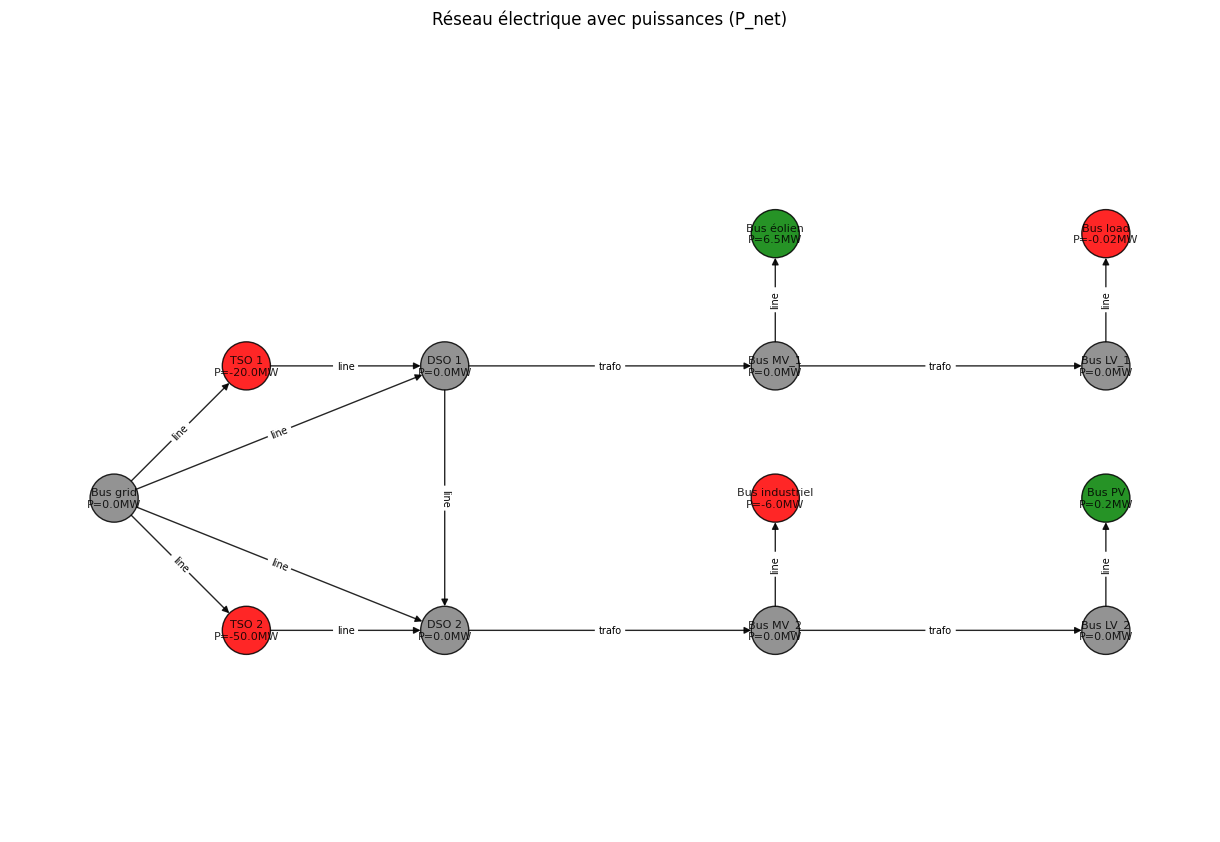

Value of G.nodes[11]['P'] after updating G: -20.0


In [ ]:
G, plot_func = create_digraph()
print(f"Value of G.nodes[11]['P'] after updating G: {G.nodes[11]['P']}")

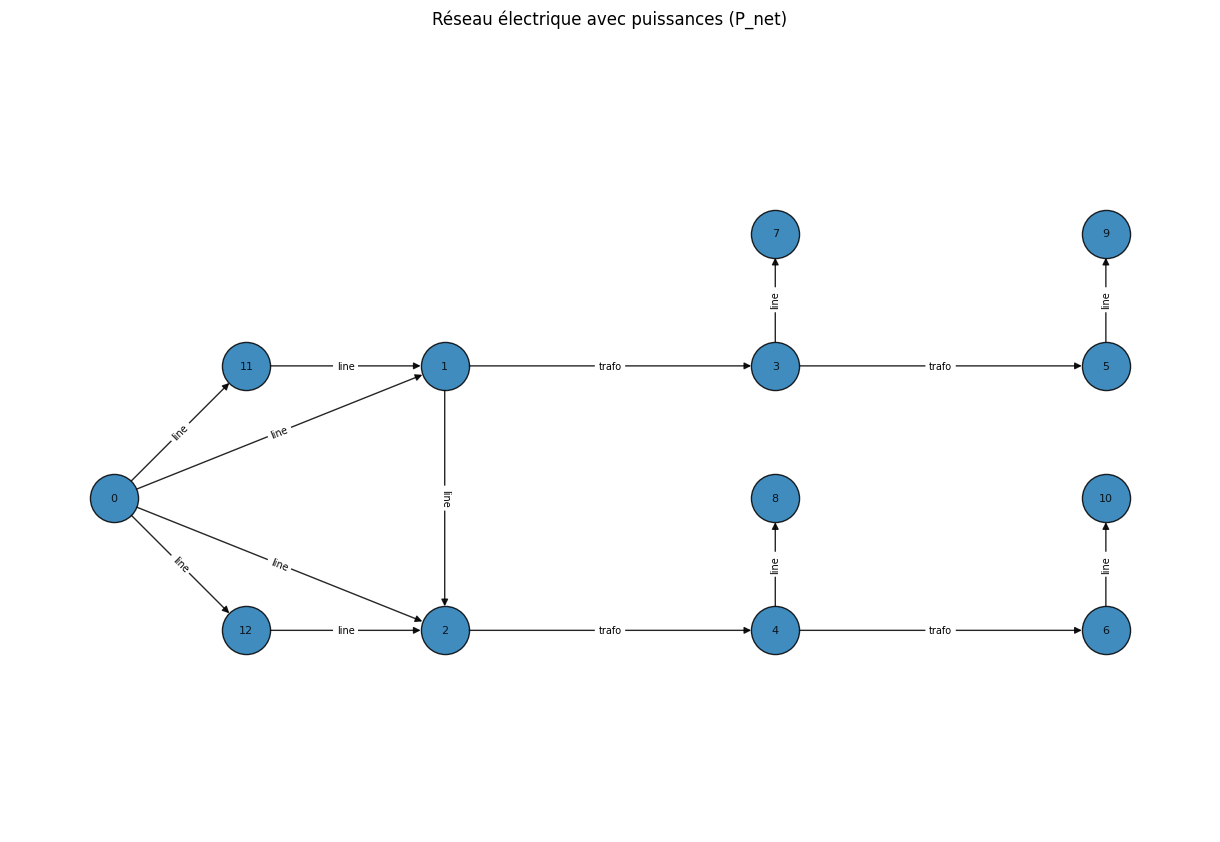

In [ ]:
def plot_network(G):
      pos = nx.get_node_attributes(G, 'pos')

      plt.figure(figsize=(12, 8))
      nx.draw(
          G, pos,
          with_labels=True,
          node_size=1200,
          edgecolors="black", font_size=8,
          alpha=0.85
          )

  # Labels des arêtes (type ligne ou trafo)
      edge_labels = nx.get_edge_attributes(G, 'type')
      nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

      plt.title("Réseau électrique avec puissances (P_net)")
      plt.axis("equal")
      plt.show()

plot_network(G)

In [ ]:
# Define base values for the per-unit system
s_base = 100  # MVA


v_base_high = 110 # kV (From the create_network function)

# Calculate base current (I_base)
# S_base = V_base * I_base (for single phase, or sqrt(3)*V_base*I_base for three phase)
# Assuming three-phase system: I_base = S_base / (sqrt(3) * V_base)
i_base_high = s_base / (math.sqrt(3) * v_base_high) # kA

# Calculate base impedance (Z_base)
# Z_base = V_base^2 / S_base
z_base_high = v_base_high**2 / s_base # ohms

# Calculate base susceptance (B_base)
# B_base = 1 / Z_base = S_base / V_base^2
b_base_high = s_base / v_base_high**2 # Siemens

print(f"Base Power (S_base): {s_base} MVA")
print(f"Base Voltage (V_base_high): {v_base_high} kV")
print(f"Base Current (I_base_high): {i_base_high} kA")
print(f"Base Impedance (Z_base_high): {z_base_high} ohms")
print(f"Base Susceptance (B_base_high): {b_base_high} Siemens")

Base Power (S_base): 100 MVA
Base Voltage (V_base_high): 110 kV
Base Current (I_base_high): 0.524863881081478 kA
Base Impedance (Z_base_high): 121.0 ohms
Base Susceptance (B_base_high): 0.008264462809917356 Siemens


In [ ]:
# Define the maximum current in kA
I_max_kA = 0.47

# Get the base current in kA from the previous calculation
# Assuming i_base_high is the relevant base current for the lines in the model
I_base_kA = i_base_high

# Calculate the upper bound for current in per-unit
I_max_pu = I_max_kA / I_base_kA

# The lower bound for current is the negative of the upper bound, assuming symmetrical limits
I_min_pu = -I_max_pu

print(f"Maximum Current (kA): {I_max_kA}")
print(f"Base Current (kA): {I_base_kA}")
print(f"Upper bound for current (per-unit): {I_max_pu}")
print(f"Lower bound for current (per-unit): {I_min_pu}")

# Update the Pyomo model's bounds if they are defined globally or need to be updated
# Assuming I_min and I_max are global variables used in the Pyomo model definition
I_min = I_min_pu
I_max = I_max_pu

print("\nUpdated global current bounds (per-unit):")
print(f"I_min: {I_min}")
print(f"I_max: {I_max}")

Maximum Current (kA): 0.47
Base Current (kA): 0.524863881081478
Upper bound for current (per-unit): 0.8954702675131095
Lower bound for current (per-unit): -0.8954702675131095

Updated global current bounds (per-unit):
I_min: -0.8954702675131095
I_max: 0.8954702675131095


In [ ]:
def calculate_current_bounds(line_type, v_base):
    """
    Calculates the upper and lower bounds for current in per-unit
    based on the line type's maximum current capacity.

    Args:
        line_type (str): The type of the transmission line.
        i_base_kA (float): The base current in kA for the system.

    Returns:
        tuple: A tuple containing (I_min_pu, I_max_pu).
               Returns (None, None) if the line type is not found.
    """
    # Define a dictionary mapping line types to their maximum current capacity in kA
    # NOTE: This is a placeholder. You should populate this dictionary
    # with the actual maximum current capacities for your line types.
    i_base_kA = s_base / (math.sqrt(3) * v_base) # kA


    line_type_max_current_kA = {
        '149-AL1/24-ST1A 110.0': 0.47, # Example value for 110 kV lines
        'NA2XS2Y 1x185 RM/25 12/20 kV': 0.3, # Example value for 20 kV lines
        '94-AL1/15-ST1A 0.4': 0.15 # Example value for 0.4 kV lines
    }

    if line_type in line_type_max_current_kA:
        I_max_kA = line_type_max_current_kA[line_type]

        # Calculate the upper bound for current in per-unit
        I_max_pu = I_max_kA / i_base_kA

        # The lower bound for current is the negative of the upper bound
        I_min_pu = -I_max_pu

        return I_min_pu, I_max_pu, i_base_kA

    elif line_type == None:
        return -1000, 1000
    else:
        return None, None

# Example usage (assuming i_base_high is already defined):
line1_type = '149-AL1/24-ST1A 110.0'
I_min_line1, I_max_line1, i_base_kA = calculate_current_bounds(line1_type, i_base_high)

# line4_type = 'NA2XS2Y 1x185 RM/25 12/20 kV'
# I_min_line4, I_max_line4 = calculate_current_bounds(line4_type, i_base_high)
# print(f"\nCurrent bounds for {line4_type}: [{I_min_line4}, {I_max_line4}]")

In [ ]:
def length (i, j):
    xi, yi = G.nodes[i]['pos']
    xj, yj = G.nodes[j]['pos']
    return (math.hypot(xi - xj, yi - yj))*10/1000  # distance euclidienne, *10/1000 (pixel/km)
length(0, 1)

0.053851648071345036

In [ ]:
#Calculate the susceptance of each line in Siemens per km
strange = 1000
for u, v in G.edges():
    G[u][v]['b'] = length(u,v)* 200*10**-6 *strange
    print(G[u][v]['b'])


0.010770329614269008
0.010770329614269008
0.005656854249492381
0.005656854249492381
0.008
0.009999999999999998
0.009999999999999998
0.004
0.009999999999999998
0.004
0.009999999999999998
0.004
0.004
0.006
0.006


In [ ]:
#Constant definition
V_min = 0.9
V_max = 1.1


P_min = -1.5
P_max = 1.5

theta_min = -180
theta_max = 180


alpha = 1


In [ ]:
def get_base_node_voltage_kv(node_index):
  """
  Returns the voltage (vn_kv) for a given node index from the graph.

  Args:
    node_index: The index of the node in the graph.

  Returns:
    The voltage in kV for the specified node.
  """
  # Assuming 'G' is the NetworkX DiGraph object created earlier
  # Access the 'vn_kv' attribute for the given node_index
  return G.nodes[node_index]['vn_kv']

# Example usage:
# To get the voltage for node 0:
# voltage_node_0 = get_node_voltage_kv(0)
# print(f"Voltage at node 0: {voltage_node_0} kV")

# To get the voltage for node 3:
voltage_node_3 = get_base_node_voltage_kv(0)
print(f"Voltage at node 3: {voltage_node_3} kV")

Voltage at node 3: 110.0 kV


In [ ]:
m = pyo.ConcreteModel()
# Define base values for the per-unit system
s_base = 100  # MVA
v_base_high = 110 # kV (From the create_network function)

m.Nodes = pyo.Set(initialize= [b for b in G.nodes])
m.Lines = pyo.Set(initialize= [l for l in G.edges])
m.i = pyo.Set(initialize=[0, 1]) # Initialize m.i with two generic elements
m.j = pyo.Set(initialize= [0, 1])
#m.children = pyo.Set(initialize= [1, 2])
m.parents = pyo.Set(initialize = [0])

m.P = pyo.Param(m.Nodes, initialize = {n: - G.nodes[n].get('P') for n in G.nodes}, domain = pyo.Reals, mutable=True) # Make P mutable

m.I_min = pyo.Param(m.Lines, initialize = {(i,j): calculate_current_bounds(G.edges[i,j]["std_type"], get_base_node_voltage_kv(i))[0] for (i,j) in m.Lines}, domain = pyo.Reals)
m.I_max = pyo.Param(m.Lines, initialize = {(i,j): calculate_current_bounds(G.edges[i,j]["std_type"], get_base_node_voltage_kv(i))[1] for (i,j) in m.Lines}, domain = pyo.Reals)

print(m.I_min[(0,1)])
print(m.I_max[(0,1)])

# Variables principales
m.F = pyo.Var(m.Lines, m.i, m.j, domain=pyo.Reals)     # active power flow through lines
m.I = pyo.Var(m.Lines,  m.i, m.j, domain=pyo.Reals)  # current flowing through lines
m.theta = pyo.Var(m.Nodes,  m.i, m.j, domain=pyo.Reals)  # phase angle of the voltage
m.V = pyo.Var(m.Nodes, m.i, m.j, domain=pyo.NonNegativeReals)  # voltage magnitude at each node
m.E = pyo.Var(m.Nodes, m.i, m.j, domain=pyo.Reals) #net power injection/consumption
m.P_plus = pyo.Var(m.parents, m.i, m.j, domain=pyo.Reals) #power entering the operational graph
#m.P_minus = pyo.Var(m.children, m.i, m.j, domain=pyo.Reals) #power leaving the operational graph

#m.P_C_set = pyo.Var(m.children, m.i, domain=pyo.Reals) #vertices of the power envelope at each child node

#m.P_C_min = pyo.Var(m.children, m.i, m.j, domain=pyo.Reals)
#m.P_C_max = pyo.Var(m.children, m.i, m.j,  domain=pyo.Reals)

m.V_P = pyo.Param(m.j, initialize = {0: 0.9, 1: 1.1}, domain =pyo.NonNegativeReals)

m.O = pyo.Var(domain= pyo.NonNegativeReals)

for u in G.nodes():
  if G.nodes[u].get('P', 0.0) == 0:
    m.P[u] = 0
  else:
    G.nodes[u]['P_pu'] = G.nodes[u].get('P', 0.0) / s_base
    m.P[u] = - G.nodes[u]['P_pu']

"""# Convert P parameter to per-unit
for n in G.nodes:
    # Assuming P is in MW, convert to per-unit
    G.nodes[n]['P'] = G.nodes[n].get('P', 0.0) / s_base
    m.P[n] = G.nodes[n]['P']"""


# Convert susceptance 'b' on edges to per-unit
for u, v in G.edges():
    # Assuming 'b' is in Siemens/km, convert to per-unit
    # b_pu = b_actual * (V_base^2 / S_base)
    # V_base is assumed to be v_base_high (110 kV)
    G[u][v]['b_pu'] = G[u][v].get('b', 0.0) * (get_base_node_voltage_kv(u)**2 / s_base)
    print(G[u][v]['b_pu'])

-0.8954702675131095
0.8954702675131095
1.30320988332655
1.30320988332655
0.6844793641885781
0.6844793641885781
0.968
1.2099999999999997
1.2099999999999997
0.016
0.039999999999999994
0.016
0.039999999999999994
6.400000000000001e-06
6.400000000000001e-06
0.726
0.726


In [ ]:
for n in G.nodes:
  print(m.P[n].value)
m.P[1].value


0
0
0
0
0
0
0
-0.065
0.06
0.0002
-0.002
0.2
0.5


0

In [ ]:


# Auxiliary variable for the absolute value of E (already defined as per-unit)
m.z = pyo.Var(m.Nodes, m.i, m.j, domain=pyo.NonNegativeReals)

m.curt = pyo.Var(m.Nodes, m.i, m.j, domain=pyo.Reals)

def curtailment_def_rule(m,n, vert_pow, vert_volt):

  return m.curt[n, vert_pow, vert_volt] == m.P[n] - m.E[n, vert_pow, vert_volt]

m.curt_def = pyo.Constraint(m.Nodes, m.i, m.j, rule=curtailment_def_rule)
# Constraints to define the absolute value (already defined for per-unit E)
def abs_E_pos_rule(m, n, vert_pow, vert_volt):
    return m.z[n, vert_pow, vert_volt] >= m.curt[n, vert_pow, vert_volt]
m.abs_E_pos = pyo.Constraint(m.Nodes, m.i, m.j, rule=abs_E_pos_rule)

def abs_E_neg_rule(m, n, vert_pow, vert_volt):
    return m.z[n, vert_pow, vert_volt] >= -m.curt[n, vert_pow, vert_volt]
m.abs_E_neg = pyo.Constraint(m.Nodes, m.i, m.j, rule=abs_E_neg_rule)

def upper_bound_rule(m, vert_pow, vert_volt):
    # m.z is per-unit, m.O is per-unit
    return sum(m.z[n, vert_pow, vert_volt] for n in m.Nodes) <= m.O

m.upper_bound = pyo.Constraint(m.i, m.j, rule=upper_bound_rule)

# Current magnitude constraint (I_min, I_max are assumed per-unit)
def current_bounds_rule(m, i, j, vert_pow, vert_volt):
    # m.I is per-unit current
    return pyo.inequality(-1, m.I[i,j, vert_pow, vert_volt], 1)
m.CurrentBounds = pyo.Constraint(m.Lines, m.i, m.j, rule=current_bounds_rule)

def phase_constr_rule(m,n, vert_pow, vert_volt):
    return pyo.inequality(theta_min*2, m.theta[n, vert_pow, vert_volt], theta_max*2)

m.phaseConstr = pyo.Constraint(m.Nodes, m.i, m.j, rule=phase_constr_rule)

def dc_power_flow_rule(m, i, j, vert_pow, vert_volt):
    return m.F[i, j, vert_pow, vert_volt] == m.V_P[vert_volt]**2 *(G[i][j]['b_pu'] * (
        m.theta[i, vert_pow, vert_volt] - m.theta[j, vert_pow, vert_volt])
    )

m.DCFlow = pyo.Constraint(m.Lines, m.i, m.j, rule=dc_power_flow_rule)


def current_def_rule(m, n, i, j, vert_pow, vert_volt):
    # This constraint relates per-unit current, per-unit voltage, and per-unit power flow.
    # In per-unit, P_pu = V_pu * I_pu. This is correct.
    return m.I[i,j, vert_pow, vert_volt] * m.V_P[vert_volt] == m.F[i,j, vert_pow, vert_volt]

m.current_def = pyo.Constraint(m.Nodes, m.Lines, m.i, m.j, rule=current_def_rule)



def nodes_balance(m, n, vert_pow, vert_volt):
    inflow = sum(m.F[k, n, vert_pow, vert_volt] for k in G.predecessors(n) if (k, n) in m.Lines)
    outflow = sum(m.F[n, j, vert_pow, vert_volt] for j in G.successors(n) if (n, j) in m.Lines)
    if n in m.parents:
      return inflow - outflow  ==  m.E[n, vert_pow, vert_volt] - m.P_plus[n, vert_pow, vert_volt]

    else:
      return inflow - outflow ==  m.E[n,vert_pow,vert_volt]

m.nodes_balance = pyo.Constraint(m.Nodes, m.i, m.j, rule=nodes_balance)


def parent_power_constraint_rule(m, parent, vert_pow, vert_volt):
    # m.P_plus is per-unit power entering the operational graph
    return pyo.inequality(-2, m.P_plus[parent, vert_pow, vert_volt], 2)

m.parent_power_constraint = pyo.Constraint(m.parents, m.i, m.j, rule=parent_power_constraint_rule)

#Constant voltage assumption
def voltage_constr_rule(m, n, vert_pow, vert_volt):
    return m.V[n, vert_pow, vert_volt] == m.V_P[vert_volt]

m.voltageConstr = pyo.Constraint(m.Nodes, m.i, m.j, rule=voltage_constr_rule)




def test_rule(m):
  return m.O == 0
m.test = pyo.Constraint(rule=test_rule)
"""# Auxiliary variables for the L1 norm of P_C_set
m.abs_P_C_set = pyo.Var(m.children, domain=pyo.NonNegativeReals)

# Constraints to linearize the L1 norm of P_C_set
def abs_P_C_set_pos_rule(m, n):
    return m.abs_P_C_set[n] >= m.aux[n]
m.abs_P_C_set_pos = pyo.Constraint(m.children, rule=abs_P_C_set_pos_rule)

def abs_P_C_set_neg_rule(m, n):
    return m.abs_P_C_set[n] >= -m.aux[n]
m.abs_P_C_set_neg = pyo.Constraint(m.children, rule=abs_P_C_set_neg_rule)"""

'# Auxiliary variables for the L1 norm of P_C_set\nm.abs_P_C_set = pyo.Var(m.children, domain=pyo.NonNegativeReals)\n\n# Constraints to linearize the L1 norm of P_C_set\ndef abs_P_C_set_pos_rule(m, n):\n    return m.abs_P_C_set[n] >= m.aux[n]\nm.abs_P_C_set_pos = pyo.Constraint(m.children, rule=abs_P_C_set_pos_rule)\n\ndef abs_P_C_set_neg_rule(m, n):\n    return m.abs_P_C_set[n] >= -m.aux[n]\nm.abs_P_C_set_neg = pyo.Constraint(m.children, rule=abs_P_C_set_neg_rule)'

In [ ]:
def objective_rule(m):
  return   - alpha*m.O

m.objective = pyo.Objective(rule=objective_rule, sense=pyo.maximize)

In [ ]:
# Résolution
# -------------------------
# Create an environment with your WLS license
params = {
    "WLSACCESSID": 'efa10779-150a-495c-ab62-6a20ff44c598',
    "WLSSECRET": 'fa980d94-a6fd-4d7b-aa68-b0e19ddd2e84',
    "LICENSEID": 2651433,
}
env = gp.Env(params=params)
solver = pyo.SolverFactory('gurobi', env= env)

# Solve the model
results = solver.solve(m, tee=True)

# Check the termination condition
if results.solver.termination_condition == pyo.TerminationCondition.infeasible:
    print("The model is infeasible.")
elif results.solver.termination_condition == pyo.TerminationCondition.unbounded:
    print("The model is unbounded.")
elif results.solver.termination_condition == pyo.TerminationCondition.infeasibleOrUnbounded:
    print("The model is infeasible or unbounded.")
else:
    print("Solver terminated with condition:", results.solver.termination_condition)
    # Print the results (optional, but good practice)
    print(results)

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpivgsyds6.pyomo.lp
Reading time = 0.00 seconds
x1: 1337 rows, 385 columns, 2569 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 1337 rows, 385 columns and 2569 nonzeros
Model fingerprint: 0xafcb6dfb
Coefficient statistics:
  Matrix range     [5e-06, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-04, 4e+02]
Presolve removed 1317 rows and 365 columns
Presolve time: 0.01s
Presolved: 20 rows, 20 columns, 60 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -0.0000000e+00 

In [ ]:
info_DSO_node1 = m.F[1, 3, 0, 0].value
info_DSO_node2 = m.F[2, 4, 0, 0].value
print(info_DSO_node1)
print(info_DSO_node2)

info_DSO = [info_DSO_node1, info_DSO_node2]

-0.0648
0.057999999999999996


In [ ]:
print(m.theta[0,0,1].value)
print(G[0][11]['b_pu'])

101.8539599998032
0.6844793641885781


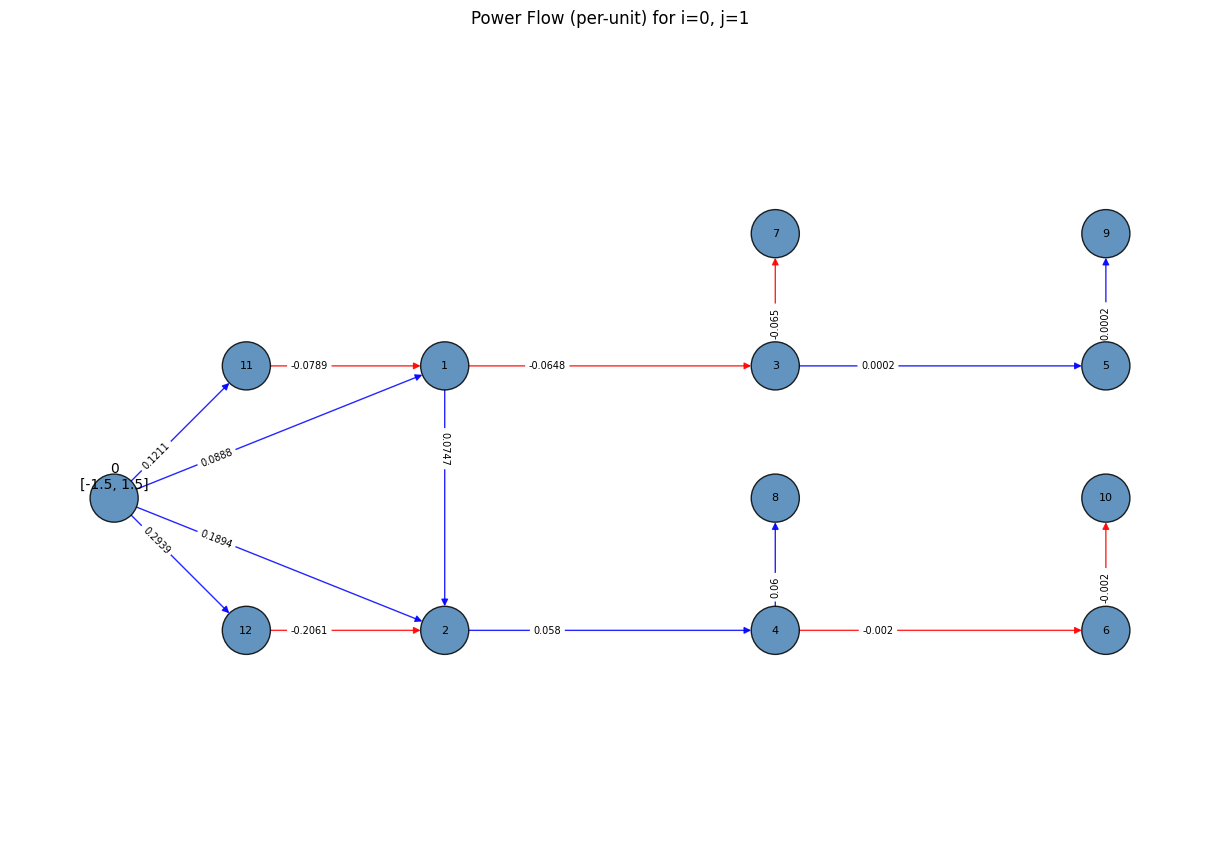

In [ ]:
def plot_power_flow(m, i, j):
    pos = nx.get_node_attributes(G, 'pos')
    # Use node indices as labels
    labels = {}
    label_colors = [] # This is for node colors, will remove this later if needed or set to default
    for n in G.nodes():
        label_text = f"{n}"
        if n in m.parents:
            # Display parent bounds using the global P_min and P_max parameters
            label_text += f"\n[{P_min}, {P_max}]"
            # No specific color for label text here, use default
            label_colors.append('steelblue') # Default node color based on previous plots
        else:
            label_colors.append('steelblue') # Default node color
        labels[n] = label_text


    plt.figure(figsize=(12, 8))

    edge_colors = []
    edge_labels = {}

    for u, v in G.edges():
        try:
            # Correct the sign of the flow value for plotting
            flow_value = m.F[u, v, i, j].value
            if flow_value is not None:
                edge_labels[(u, v)] = f"{round(flow_value, 4)}"
                if flow_value > 0:
                    edge_colors.append('blue')  # Positive flow (now correctly represents flow from u to v)
                elif flow_value < 0:
                    edge_colors.append('red')  # Negative (reverse) flow (now correctly represents flow from v to u)
                else:
                    edge_colors.append('gray') # No flow
            else:
                edge_colors.append('gray') # No flow value
        except:
            edge_colors.append('gray') # Handle cases where edge might not be in m.F

    # Draw the network
    nx.draw(
        G, pos,
        with_labels=False, # Draw labels separately for color control
        node_size=1200,
        edge_color=edge_colors, # Use the calculated edge colors
        edgecolors="black", font_size=8,
        alpha=0.85,
        node_color = label_colors # Apply node colors
    )

    # Draw labels with different colors
    for n in G.nodes():
        x, y = pos[n]
        text = labels[n]
        if n in m.parents:
             plt.text(x, y + 0.1, text, fontsize=10, ha='center', va='bottom', color='black') # Color parent bounds black
        else:
             plt.text(x, y, text, fontsize=8, ha='center', va='center', color='black') # Default color for other labels


    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7, label_pos=0.3)

    plt.title(f"Power Flow (per-unit) for i={i}, j={j}")
    plt.axis("equal")
    plt.show()

# Example usage (assuming m, i=0, and j=0 are defined)
plot_power_flow(m, 0, 1)

In [ ]:
def create_network():

    import pandapower as pp

# Crée le réseau
    net = pp.create_empty_network()

# Bases
    Pbase = 100  # MVA
    Vbase_high = 110  # kV
    Vbase_medium = 20  # kV
    Vbase_low = 0.4  # kV

# Buses
    b0 = pp.create_bus(net, vn_kv=Vbase_high, name="Bus grid", geodata=(0,10))
    b1 = pp.create_bus(net, vn_kv=Vbase_high, name="DSO 1", geodata=(5,12))
    b2 = pp.create_bus(net, vn_kv=Vbase_high, name="DSO 2", geodata=(5,8))
    b3 = pp.create_bus(net, vn_kv=Vbase_medium, name="Bus MV_1", geodata=(10,12))
    b4 = pp.create_bus(net, vn_kv=Vbase_medium, name="Bus MV_2", geodata=(10,8))
    b5 = pp.create_bus(net, vn_kv=Vbase_low, name="Bus LV_1", geodata=(15,12))
    b6 = pp.create_bus(net, vn_kv=Vbase_low, name="Bus LV_2", geodata=(15,8))
    b7 = pp.create_bus(net, vn_kv=Vbase_medium, name="Bus éolien", geodata=(10,14))
    b8 = pp.create_bus(net, vn_kv=Vbase_medium, name="Bus industriel", geodata=(10,10))
    b9 = pp.create_bus(net, vn_kv=Vbase_low, name="Bus load", geodata=(15,14))
    b10 = pp.create_bus(net, vn_kv=Vbase_low, name="Bus PV", geodata=(15,10))
    b11 = pp.create_bus(net, vn_kv=Vbase_high, name="TSO 1", geodata=(2,12))
    b12 = pp.create_bus(net, vn_kv=Vbase_high, name="TSO 2", geodata=(2,8))

# Lignes
    pp.create_line(net, b0, b1, length_km=12, std_type='149-AL1/24-ST1A 110.0', name="line1")
    pp.create_line(net, b1, b2, length_km=10, std_type='149-AL1/24-ST1A 110.0', name="line2")
    pp.create_line(net, b0, b2, length_km=10, std_type='149-AL1/24-ST1A 110.0', name="line3")
    pp.create_line(net, b3, b7, length_km=0.23, std_type='NA2XS2Y 1x185 RM/25 12/20 kV', name="line4")
    pp.create_line(net, b4, b8, length_km=0.3, std_type='NA2XS2Y 1x185 RM/25 12/20 kV', name="line5")
    pp.create_line(net, b5, b9, length_km=3, std_type='94-AL1/15-ST1A 0.4', name="line6")
    pp.create_line(net, b6, b10, length_km=0.45, std_type='94-AL1/15-ST1A 0.4', name="line7")
    pp.create_line(net, b0, b11, length_km=16, std_type='149-AL1/24-ST1A 110.0', name= 'line8')
    pp.create_line(net, b11, b1, length_km=24, std_type='149-AL1/24-ST1A 110.0', name= 'line9')
    pp.create_line(net, b0, b12, length_km=22, std_type='149-AL1/24-ST1A 110.0', name= 'line10')
    pp.create_line(net, b12, b2, length_km=16, std_type='149-AL1/24-ST1A 110.0', name= 'line11')

# Transformateurs
    pp.create_transformer(net, b1, b3, std_type="25 MVA 110/20 kV", name="TR_1")
    pp.create_transformer(net, b2, b4, std_type="25 MVA 110/20 kV", name="TR_2")
    pp.create_transformer(net, b3, b5, std_type="0.4 MVA 20/0.4 kV", name="TR_3")
    pp.create_transformer(net, b4, b6, std_type="0.4 MVA 20/0.4 kV", name="TR_4")

# Éléments de bus
    pp.create_ext_grid(net, bus=b0, vm_pu=1.00, name="Grid Connection")
    pp.create_load(net, bus=b9, p_mw=0.02, q_mvar=0.02, name="Residential Load")
    pp.create_gen(net, bus=b10, p_mw=0.2, vm_pu=1.00, name="PV", max_q_mvar=200, min_q_mvar=0, max_p_mw=300, min_p_mw=0, controllable=False)
    pp.create_gen(net, bus=b7, p_mw=6.5, vm_pu=1.0, name="Wind Turbine", controllable=False)
    pp.create_load(net, bus=b8, p_mw=6, q_mvar=1.8, name="Industry")
    pp.create_load(net, bus=b11, p_mw=20, q_mvar=9, name="Datacenter")
    pp.create_load(net, bus=b12, p_mw=50, q_mvar=24, name="Big industry")

# Donner accès à net
    return net

In [ ]:
def create_digraph():
  net = create_network()

  import json
  import networkx as nx
  import matplotlib.pyplot as plt
# 1. Conversion du réseau Pandapower en DiGraph
# ================================
  G = nx.DiGraph()

# Créer les positions à partir de la colonne "geo"
  pos = {}
  for idx, row in net.bus.iterrows():
  # Extraire le champ 'geo' qui est une chaîne de caractères représentant un dictionnaire JSON
      geo_data = row['geo']

  # Convertir la chaîne JSON en un dictionnaire Python
      geo_dict = json.loads(geo_data)

  # Extraire la liste des coordonnées
      coordinates = geo_dict["coordinates"]

  # Ajouter les coordonnées dans le dictionnaire pos
      pos[idx] = tuple(coordinates)  # Assigner les coordonnées sous forme de tuple

# Ajouter les nœuds (avec le nom comme label) and voltage
  for idx, row in net.bus.iterrows():
      G.add_node(idx, label=row["name"], pos=pos[idx], vn_kv=row["vn_kv"])


# Ajouter les arêtes pour les lines
  for _, row in net.line.iterrows():
      G.add_edge(row["from_bus"], row["to_bus"], type="line", name=row["name"], length=row["length_km"], std_type=row["std_type"])

# Ajouter les arêtes pour les transformateurs
  for _, row in net.trafo.iterrows():
      G.add_edge(row["hv_bus"], row["lv_bus"], type="trafo", name=row["name"], std_type = None)

# Ajouter les générateurs et les charges comme attributs aux nœuds
  for _, row in net.gen.iterrows():
      G.nodes[row["bus"]]["type"] = "gen"
      G.nodes[row["bus"]]["gen_name"] = row["name"]
      G.nodes[row["bus"]]["gen_power"] = row["p_mw"]

  for _, row in net.load.iterrows():
      G.nodes[row["bus"]]["type"] = "load"
      G.nodes[row["bus"]]["load_name"] = row["name"]
      G.nodes[row["bus"]]["load_power"] = row["p_mw"]

  for _, row in net.ext_grid.iterrows():
      G.nodes[row["bus"]]["type"] = "ext_grid"
      G.nodes[row["bus"]]["grid_name"] = row["name"]

# 2. Ajout des puissances consommées et injectées aux nœuds
# ================================
  nx.set_node_attributes(G, 0.0, "P_load")
  nx.set_node_attributes(G, 0.0, "P_gen")

# Charges
  for _, row in net.load.iterrows():
      G.nodes[row["bus"]]["P_load"] += row["p_mw"]
      print(row)

# Générateurs
  for _, row in net.gen.iterrows():
      G.nodes[row["bus"]]["P_gen"] += row["p_mw"]

# Source externe
  for _, row in net.ext_grid.iterrows():
      G.nodes[row["bus"]]["P_gen"] += 0

# Calculate P_net
  for n in G.nodes:
      G.nodes[n]["P_net"] = G.nodes[n]["P_gen"] - G.nodes[n]["P_load"]

# Create subnetworks (NetworkX DiGraphs) from the main graph G
  network1_buses = [0, 1, 2, 11,12]
  network2_buses = [3, 7, 5, 9, 10]
  network3_buses = [4, 8, 6]

# Assign G1 to G and then add power attributes to nodes in G
  G = G.subgraph(network1_buses)

  for n in G.nodes:
      G.nodes[n]["P"] = G.nodes[n]["P_net"] # Assign P_net to 'P' attribute

# 3. Préparer les couleurs des nœuds en fonction de P_net
# ================================
  node_colors = []
  for n, data in G.nodes(data=True):
      if data["P_net"] > 0:
          node_colors.append("green")   # producteur
      elif data["P_net"] < 0:
          node_colors.append("red")     # consommateur
      else:
          node_colors.append("gray")    # neutre

# 4. Préparer les labels : Nom + P_net
# ================================
  labels = {n: f"{data['label']}\nP={round(data['P_net'],2)}MW"
            for n, data in G.nodes(data=True)}

# 5. Function to plot the network
# ================================
  def plot_network():
      pos = nx.get_node_attributes(G, 'pos')

      plt.figure(figsize=(12, 8))
      nx.draw(
          G, pos,
          with_labels=True, labels=labels,
          node_size=1200, node_color=node_colors,
          edgecolors="black", font_size=8,
          alpha=0.85
          )

  # Labels des arêtes (type ligne ou trafo)
      edge_labels = nx.get_edge_attributes(G, 'type')
      nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

      plt.title("Réseau électrique avec puissances (P_net)")
      plt.axis("equal")
      plt.show()


  return G, plot_network()

name               Residential Load
bus                               9
p_mw                           0.02
q_mvar                         0.02
const_z_percent                 0.0
const_i_percent                 0.0
sn_mva                          NaN
scaling                         1.0
in_service                     True
type                            wye
Name: 0, dtype: object
name               Industry
bus                       8
p_mw                    6.0
q_mvar                  1.8
const_z_percent         0.0
const_i_percent         0.0
sn_mva                  NaN
scaling                 1.0
in_service             True
type                    wye
Name: 1, dtype: object
name               Datacenter
bus                        11
p_mw                     20.0
q_mvar                    9.0
const_z_percent           0.0
const_i_percent           0.0
sn_mva                    NaN
scaling                   1.0
in_service               True
type                      wye
Name: 2, dtype

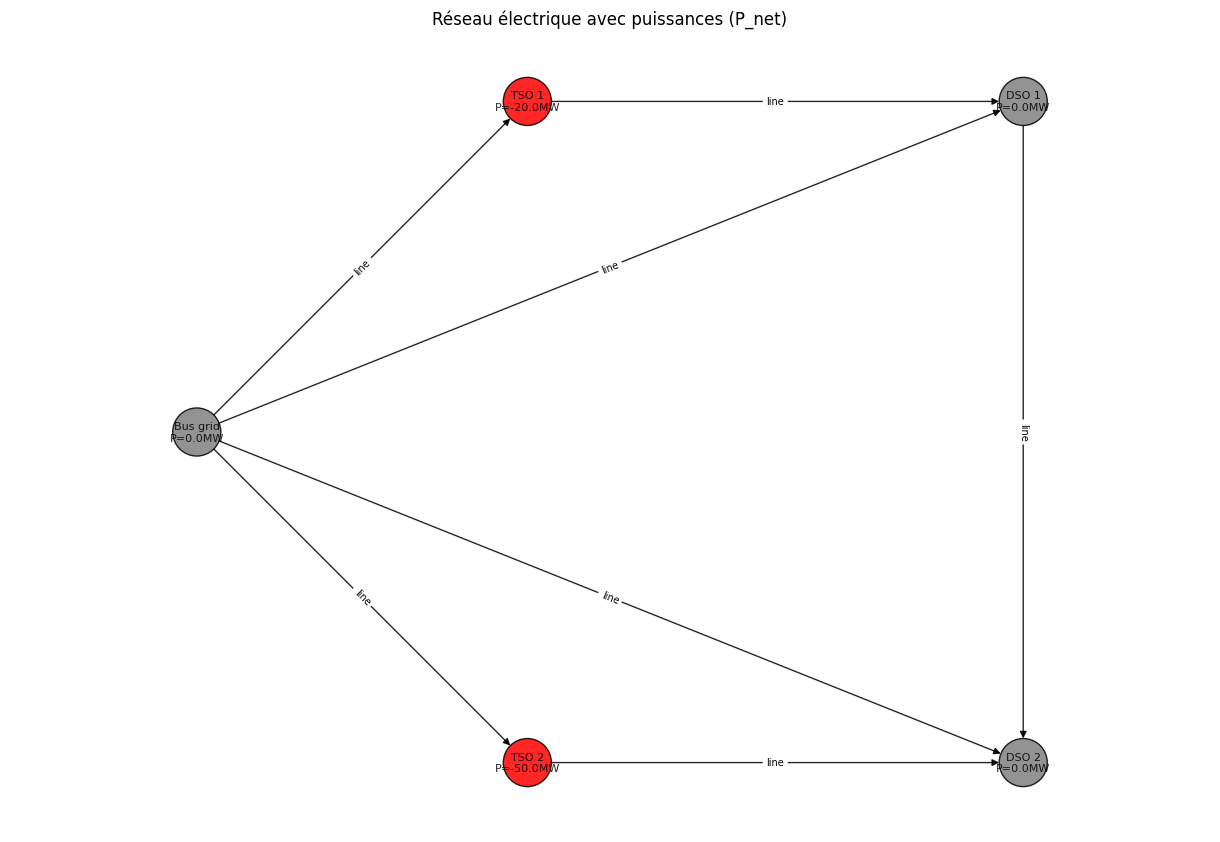

In [ ]:
G, plot_func = create_digraph()

In [ ]:
#Calculate the susceptance of each line in Siemens per km
strange = 1000
for u, v in G.edges():
    G[u][v]['b'] = length(u,v)* 200*10**-6 *strange
    print(G[u][v]['b'])

0.010770329614269008
0.010770329614269008
0.005656854249492381
0.005656854249492381
0.008
0.006
0.006


In [ ]:
# Convert susceptance 'b' on edges to per-unit
for u, v in G.edges():
    # Assuming 'b' is in Siemens/km, convert to per-unit
    # b_pu = b_actual * (V_base^2 / S_base)
    # V_base is assumed to be v_base_high (110 kV)
    G[u][v]['b_pu'] = G[u][v].get('b', 0.0) * (get_base_node_voltage_kv(u)**2 / s_base)
    print(G[u][v]['b_pu'])

1.30320988332655
1.30320988332655
0.6844793641885781
0.6844793641885781
0.968
0.726
0.726


In [ ]:
m = pyo.ConcreteModel()
# Define base values for the per-unit system
s_base = 100  # MVA
v_base_high = 110 # kV (From the create_network function)

m.Nodes = pyo.Set(initialize= [b for b in G.nodes])
m.Lines = pyo.Set(initialize= [l for l in G.edges])
m.i = pyo.Set(initialize=[0, 1]) # Initialize m.i with two generic elements
m.j = pyo.Set(initialize= [0, 1])
m.children = pyo.Set(initialize= [1, 2])
m.parents = pyo.Set(initialize = [0])

m.P = pyo.Param(m.Nodes, initialize = {n: - G.nodes[n].get('P') for n in G.nodes}, domain = pyo.Reals, mutable=True) # Make P mutable
m.P_absolute_value = pyo.Param(m.Nodes, initialize = {n: abs(m.P[n]) for n in G.nodes}, domain = pyo.NonNegativeReals) # Make P mutable

m.info_DSO_param = pyo.Param(m.children, initialize = {n: info_DSO[n-1] for n in m.children}, domain = pyo.Reals) # Renamed parameter and adjusted index for list

m.I_min = pyo.Param(m.Lines, initialize = {(i,j): calculate_current_bounds(G.edges[i,j]["std_type"], get_base_node_voltage_kv(i))[0] for (i,j) in m.Lines}, domain = pyo.Reals)
m.I_max = pyo.Param(m.Lines, initialize = {(i,j): calculate_current_bounds(G.edges[i,j]["std_type"], get_base_node_voltage_kv(i))[1] for (i,j) in m.Lines}, domain = pyo.Reals)

print(m.I_min[(0,1)])
print(m.I_max[(0,1)])

# Variables principales
m.F = pyo.Var(m.Lines, m.i, m.j, domain=pyo.Reals)     # active power flow through lines
m.I = pyo.Var(m.Lines,  m.i, m.j, domain=pyo.Reals)  # current flowing through lines
m.theta = pyo.Var(m.Nodes,  m.i, m.j, domain=pyo.Reals)  # phase angle of the voltage
m.V = pyo.Var(m.Nodes, m.i, m.j, domain=pyo.NonNegativeReals)  # voltage magnitude at each node
m.E = pyo.Var(m.Nodes, m.i, m.j, domain=pyo.Reals) #net power injection/consumption
m.P_plus = pyo.Var(m.parents, m.i, m.j, domain=pyo.Reals) #power entering the operational graph
m.P_minus = pyo.Var(m.children, m.i, m.j, domain=pyo.Reals) #power leaving the operational graph

m.P_C_set = pyo.Var(m.children, m.i, domain=pyo.Reals) #vertices of the power envelope at each child node

#m.P_C_min = pyo.Var(m.children, m.i, m.j, domain=pyo.Reals)
#m.P_C_max = pyo.Var(m.children, m.i, m.j,  domain=pyo.Reals)

m.V_P = pyo.Param(m.j, initialize = {0: 0.9, 1: 1.1}, domain =pyo.NonNegativeReals)

m.O = pyo.Var(domain= pyo.NonNegativeReals)
m.tot = pyo.Var(domain= pyo.Reals)
m.aux = pyo.Var(m.children, domain=pyo.Reals)
m.diff_DSO = pyo.Var(m.children, domain=pyo.NonNegativeReals)

for u in G.nodes():
  if G.nodes[u].get('P', 0.0) / s_base == 0:
    m.P[u] = 0
  else:
    G.nodes[u]['P_pu'] = G.nodes[u].get('P', 0.0) / s_base
    m.P[u] = - G.nodes[u]['P_pu']

"""# Convert P parameter to per-unit
for n in G.nodes:
    # Assuming P is in MW, convert to per-unit
    G.nodes[n]['P'] = G.nodes[n].get('P', 0.0) / s_base
    m.P[n] = G.nodes[n]['P']"""


# Convert susceptance 'b' on edges to per-unit
for u, v in G.edges():
    # Assuming 'b' is in Siemens/km, convert to per-unit
    # b_pu = b_actual * (V_base^2 / S_base)
    # V_base is assumed to be v_base_high (110 kV)
    G[u][v]['b_pu'] = G[u][v].get('b', 0.0) * (get_base_node_voltage_kv(u)**2 / s_base)

    print(G[u][v]['b_pu'])

-0.8954702675131095
0.8954702675131095
1.30320988332655
1.30320988332655
0.6844793641885781
0.6844793641885781
0.968
0.726
0.726


In [ ]:
for n in G.nodes:
  print(m.P[n].value)
m.P[1].value


0
0
0
0.2
0.5


0

In [ ]:
#Children nodes consumption
def worst_case_children(m, n, vert_pow, vert_volt):
  return m.P_C_set[n, vert_pow] == m.P_minus[n, vert_pow, vert_volt]
m.worst_case = pyo.Constraint(m.children, m.i, m.j, rule=worst_case_children)


# Auxiliary variable for the absolute value of E (already defined as per-unit)
m.z = pyo.Var(m.Nodes, m.i, m.j, domain=pyo.NonNegativeReals)

m.curt = pyo.Var(m.Nodes, m.i, m.j, domain=pyo.Reals)

def curtailment_def_rule(m,n, vert_pow, vert_volt):

  return m.curt[n, vert_pow, vert_volt] == m.P[n] - m.E[n, vert_pow, vert_volt]

m.curt_def = pyo.Constraint(m.Nodes, m.i, m.j, rule=curtailment_def_rule)
# Constraints to define the absolute value (already defined for per-unit E)
def abs_E_pos_rule(m, n, vert_pow, vert_volt):
    return m.z[n, vert_pow, vert_volt] >= m.curt[n, vert_pow, vert_volt]
m.abs_E_pos = pyo.Constraint(m.Nodes, m.i, m.j, rule=abs_E_pos_rule)

def abs_E_neg_rule(m, n, vert_pow, vert_volt):
    return m.z[n, vert_pow, vert_volt] >= -m.curt[n, vert_pow, vert_volt]
m.abs_E_neg = pyo.Constraint(m.Nodes, m.i, m.j, rule=abs_E_neg_rule)

def upper_bound_rule(m, vert_pow, vert_volt):
    # m.z is per-unit, m.O is per-unit
    return sum(m.z[n, vert_pow, vert_volt] for n in m.Nodes) <= m.O

m.upper_bound = pyo.Constraint(m.i, m.j, rule=upper_bound_rule)

# Current magnitude constraint (I_min, I_max are assumed per-unit)
def current_bounds_rule(m, i, j, vert_pow, vert_volt):
    # m.I is per-unit current
    return pyo.inequality(m.I_min[(i,j)], m.I[i,j, vert_pow, vert_volt], m.I_max[(i,j)])
m.CurrentBounds = pyo.Constraint(m.Lines, m.i, m.j, rule=current_bounds_rule)

def phase_constr_rule(m,n, vert_pow, vert_volt):
    return pyo.inequality(theta_min/10, m.theta[n, vert_pow, vert_volt], theta_max/10)

m.phaseConstr = pyo.Constraint(m.Nodes, m.i, m.j, rule=phase_constr_rule)

def dc_power_flow_rule(m, i, j, vert_pow, vert_volt):
    return m.F[i, j, vert_pow, vert_volt] == m.V_P[vert_volt]**2 *(G[i][j]['b_pu'] * (
        m.theta[i, vert_pow, vert_volt] - m.theta[j, vert_pow, vert_volt])
    )

m.DCFlow = pyo.Constraint(m.Lines, m.i, m.j, rule=dc_power_flow_rule)


def current_def_rule(m, n, i, j, vert_pow, vert_volt):
    # This constraint relates per-unit current, per-unit voltage, and per-unit power flow.
    # In per-unit, P_pu = V_pu * I_pu. This is correct.
    return m.I[i,j, vert_pow, vert_volt] * m.V_P[vert_volt] == m.F[i,j, vert_pow, vert_volt]

m.current_def = pyo.Constraint(m.Nodes, m.Lines, m.i, m.j, rule=current_def_rule)



def nodes_balance(m, n, vert_pow, vert_volt):
    inflow = sum(m.F[k, n, vert_pow, vert_volt] for k in G.predecessors(n) if (k, n) in m.Lines)
    outflow = sum(m.F[n, j, vert_pow, vert_volt] for j in G.successors(n) if (n, j) in m.Lines)
    if n in m.parents:
      return inflow - outflow  ==  m.E[n, vert_pow, vert_volt] - m.P_plus[n, vert_pow, vert_volt]

    if n in m.children:
      return inflow - outflow  ==  m.E[n, vert_pow, vert_volt] + m.P_minus[n, vert_pow, vert_volt]

    else:
      return inflow - outflow ==  m.E[n,vert_pow,vert_volt]

m.nodes_balance = pyo.Constraint(m.Nodes, m.i, m.j, rule=nodes_balance)


def parent_power_constraint_rule(m, parent, vert_pow, vert_volt):
    # m.P_plus is per-unit power entering the operational graph
    return pyo.inequality(-1, m.P_plus[parent, vert_pow, vert_volt],1)

m.parent_power_constraint = pyo.Constraint(m.parents, m.i, m.j, rule=parent_power_constraint_rule)


#Constant voltage assumption
def voltage_constr_rule(m, n, vert_pow, vert_volt):
    return m.V[n, vert_pow, vert_volt] == m.V_P[vert_volt]

m.voltageConstr = pyo.Constraint(m.Nodes, m.i, m.j, rule=voltage_constr_rule)

def children_voltage_rule(m, children, vert_pow, vert_volt):
    return pyo.inequality(V_min, m.V[children, vert_pow, vert_volt], V_max)

m.children_voltage = pyo.Constraint(m.children, m.i, m.j, rule=children_voltage_rule)



def aux_constraint_rule(m, n):
  return m.aux[n] == m.P_C_set[n, 0] - m.P_C_set[n, 1]
m.aux_constraint = pyo.Constraint(m.children, rule=aux_constraint_rule)

def logical_constraint_rule(m, n):
  return m.P_C_set[n, 0] >= m.P_C_set[n, 1]
m.logical_constraint = pyo.Constraint(m.children, rule=logical_constraint_rule)

"""def info_DSO_min_rule(m,n):
  return m.P_C_set[n,1] <= m.info_DSO_param[n]
m.info_DSO_min = pyo.Constraint(m.children, rule=info_DSO_min_rule)

def info_DSO_max_rule(m,n):
  return m.P_C_set[n,0] >= m.info_DSO_param[n]
m.info_DSO_max = pyo.Constraint(m.children, rule=info_DSO_max_rule)"""

def tot_rule(m):
  return m.tot == sum(m.aux[n] for n in m.children)
m.tot_constraint = pyo.Constraint(rule=tot_rule)

def diff_DSO_rule(m,n):
  return - m.diff_DSO[n] <= (m.P_C_set[n,0] + m.P_C_set[n,1])/2 - m.info_DSO_param[n]
m.diff_DSO_constraint = pyo.Constraint(m.children, rule=diff_DSO_rule)

def diff_bis_dso_rule(m,n):
  return (m.P_C_set[n,0] + m.P_C_set[n,1])/2 - m.info_DSO_param[n] <= m.diff_DSO[n]
m.diff_bis_dso_constraint = pyo.Constraint(m.children, rule=diff_bis_dso_rule)


m.abs_diff_DSO = pyo.Var(m.children, domain=pyo.NonNegativeReals)
"""def abs_different_rule(m, n):
    return  m.abs_diff_DSO[n] >= -m.diff_DSO[n]
m.abs_different = pyo.Constraint(m.children, rule=abs_different_rule)

def abs_different_bis_rule(m, n):
    return  m.abs_diff_DSO[n] >= m.diff_DSO[n]
m.abs_different = pyo.Constraint(m.children, rule=abs_different_rule)"""

m.tot_bis = pyo.Var(domain=pyo.Reals)
def tot_bis_rule(m):
  return m.tot_bis == sum(m.diff_DSO[n] for n in m.children)
m.tot_bis_constraint = pyo.Constraint(rule=tot_bis_rule)

def net_power_constr_rule(m,n, vert_pow, vert_volt):
  return pyo.inequality(- m.P_absolute_value[n], m.E[n, vert_pow, vert_volt], m.P_absolute_value[n])

m.net_power_constr = pyo.Constraint(m.Nodes, m.i, m.j, rule=net_power_constr_rule)


"""# Auxiliary variables for the L1 norm of P_C_set
m.abs_P_C_set = pyo.Var(m.children, domain=pyo.NonNegativeReals)

# Constraints to linearize the L1 norm of P_C_set
def abs_P_C_set_pos_rule(m, n):
    return m.abs_P_C_set[n] >= m.aux[n]
m.abs_P_C_set_pos = pyo.Constraint(m.children, rule=abs_P_C_set_pos_rule)

def abs_P_C_set_neg_rule(m, n):
    return m.abs_P_C_set[n] >= -m.aux[n]
m.abs_P_C_set_neg = pyo.Constraint(m.children, rule=abs_P_C_set_neg_rule)"""

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


'# Auxiliary variables for the L1 norm of P_C_set\nm.abs_P_C_set = pyo.Var(m.children, domain=pyo.NonNegativeReals)\n\n# Constraints to linearize the L1 norm of P_C_set\ndef abs_P_C_set_pos_rule(m, n):\n    return m.abs_P_C_set[n] >= m.aux[n]\nm.abs_P_C_set_pos = pyo.Constraint(m.children, rule=abs_P_C_set_pos_rule)\n\ndef abs_P_C_set_neg_rule(m, n):\n    return m.abs_P_C_set[n] >= -m.aux[n]\nm.abs_P_C_set_neg = pyo.Constraint(m.children, rule=abs_P_C_set_neg_rule)'

In [ ]:
A = [0.5,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,1.95,2,2.05,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3,3.1,3.2]
#A = range(-3, 26)
beta = 1
enveloppe_taille = []
curtail = []
close = []

for alpha in A:
  val = 0
  print(alpha)
  print(m.P_C_set[1,0].value)
  print(m.P_C_set[1,1].value)

  print(m.P_C_set[2,0].value)
  print(m.P_C_set[2,1].value)
  def objective_rule(m):
    return  m.tot - alpha*m.O - beta * m.tot_bis
  m.objective = pyo.Objective(rule=objective_rule, sense=pyo.maximize)
  params = {
    "WLSACCESSID": 'efa10779-150a-495c-ab62-6a20ff44c598',
    "WLSSECRET": 'fa980d94-a6fd-4d7b-aa68-b0e19ddd2e84',
    "LICENSEID": 2651433,
           }
  env = gp.Env(params=params)
  solver = pyo.SolverFactory('gurobi', env= env)
  results = solver.solve(m, tee=True)

  # Check the termination condition before accessing results
  if results.solver.termination_condition == pyo.TerminationCondition.optimal:
      val = sum(abs(m.P_C_set[n,0].value) + abs(m.P_C_set[n,1].value) for n in m.children)
      # Append optimal results to lists
      curtail.append(m.O.value)
      enveloppe_taille.append(m.tot.value)
      close.append(m.tot_bis.value)

  else:
      # Append None for non-optimal results to maintain list length
      curtail.append(None)
      enveloppe_taille.append(None)
      close.append(None)

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


0.5
1.5301041203156065
-1.6597041203156064
1.6155585246877673
-1.4995585246877674
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmp8nst3ky_.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x266b79ea
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [5e-01, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration   

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1
1.5301041203156058
-1.6597041203156058
1.615558524687769
-1.4995585246877692
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpc1p92o1i.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0xa2cf959a
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.01s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Ob

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.1
1.4822464815235972
-1.611846481523597
1.626136554853152
-1.611846481523597
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmp1nxj73kn.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x5d519b97
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Ob

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.2
1.4822464815235972
-1.611846481523597
1.626136554853153
-1.611846481523597
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpd5_bvy7w.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0xf25a5962
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Ob

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.3
1.4822464815235972
-1.611846481523597
1.626136554853153
-1.611846481523597
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmp5axig9he.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0xe85cc952
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Ob

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.4
1.4822464815235972
-1.611846481523597
1.626136554853153
-1.611846481523597
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpl20ponmr.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x70b2d72e
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Ob

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpg2uakd_z.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0xb5185362
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00   2.

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.6
1.2083004821946999
-1.611846481523597
0.937417079706004
-1.611846481523597
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmp2xoq5h90.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0xbacfc07e
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Ob

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.7
1.2822994863523702
-1.611846481523597
0.6026271843684753
-1.611846481523597
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmppjci6gpt.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0xd91a13a2
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    O

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.8
1.2822994863523702
-1.611846481523597
0.6026271843684753
-1.611846481523597
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpa5vayhov.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x881f734a
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    O

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.9
1.318103390894259
-1.5468983266237573
0.4406414172531058
-1.611846481523597
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpz8pxbnt0.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0xf8b3222d
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    O

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().



1.318103390894259
-1.5468983266237573
0.4406414172531058
-1.611846481523597
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpx0gwgh9j.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0xb86f85e8
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Obje

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().



1.318103390894259
-1.5468983266237573
0.4406414172531058
-1.611846481523597
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpmkwwz31y.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x55c4e6f2
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Obje

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


2.05
1.3181033908942652
-1.5468983266237464
0.44064141725307837
-1.611846481523597
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpdj62jysx.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0xf8ef1393
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration  

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


2.1
0.024659587881951245
-1.5406595878819291
0.27534041211804366
-0.15934041211804367
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpkt4rjiqs.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x6d06729e
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.01s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteratio

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


2.2
0.024659587881951245
-1.5406595878819291
0.27534041211804366
-0.15934041211804367
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmp_d5xzwb7.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0xfe6b0f50
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteratio

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpp_0ja_4c.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x17b32408
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00   2.

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpcwgi9amr.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0xc4dcbe59
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00   2.

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().



0.024659587881951245
-1.5406595878819291
0.27534041211804366
-0.15934041211804367
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpueki2tif.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0xaddd197a
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration  

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


2.6
0.024659587881951245
-1.5406595878819291
0.27534041211804366
-0.15934041211804367
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpznqk2_29.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x67e542e9
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteratio

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


2.7
0.024659587881951245
-1.5406595878819291
0.27534041211804366
-0.15934041211804367
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmprx4_ghl_.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0xbd15191d
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteratio

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().



0.024659587881951245
-1.5406595878819291
0.27534041211804366
-0.15934041211804367
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpytt3mrck.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x022ab4e4
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration  

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().



0.024659587881951245
-1.5406595878819291
0.27534041211804366
-0.15934041211804367
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpzoxc5gw4.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x0478c6fd
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration  

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


3
0.024659587881951245
-1.5406595878819291
0.27534041211804366
-0.15934041211804367
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpqvmwij0f.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0xc26fa8c2
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration 

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().



0.024659587881951245
-1.5406595878819291
0.27534041211804366
-0.15934041211804367
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpiljp126e.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0xdd57de0f
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration  

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().



0.024659587881951245
-1.5406595878819291
0.27534041211804366
-0.15934041211804367
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmp9j804te6.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x148c2c30
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration  

In [ ]:
print(enveloppe_taille)
print(curtail)
print(close)

[6.30492529000675, 6.332075999423943, 6.332075999423944, 6.332075999423944, 6.332075999423944, 6.332075999423944, 5.369410524947899, 5.10861963376804, 5.10861963376804, 4.917489616294719, 4.917489616294719, 4.917489616294719, 4.917489616294687, 1.9999999999999678, 1.9999999999999678, 1.9999999999999678, 1.9999999999999678, 1.9999999999999678, 1.9999999999999678, 1.9999999999999678, 1.9999999999999678, 1.9999999999999678, 1.9999999999999678, 1.9999999999999678, 1.9999999999999678, 1.9999999999999678]
[2.845662645003375, 2.8083830363767497, 2.80838303637675, 2.80838303637675, 2.80838303637675, 2.80838303637675, 1.8457175619007082, 1.5849266707208456, 1.5849266707208456, 1.4587448081473648, 1.4587448081473648, 1.4587448081473648, 1.4587448081473438, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.05085496333522255, 0.05085496333522199, 0.05085496333522199, 0.05085496333522199, 0.05085496333522199, 0.5321877005732452, 0.6625831461631744, 0.6625831461631744, 0.69319

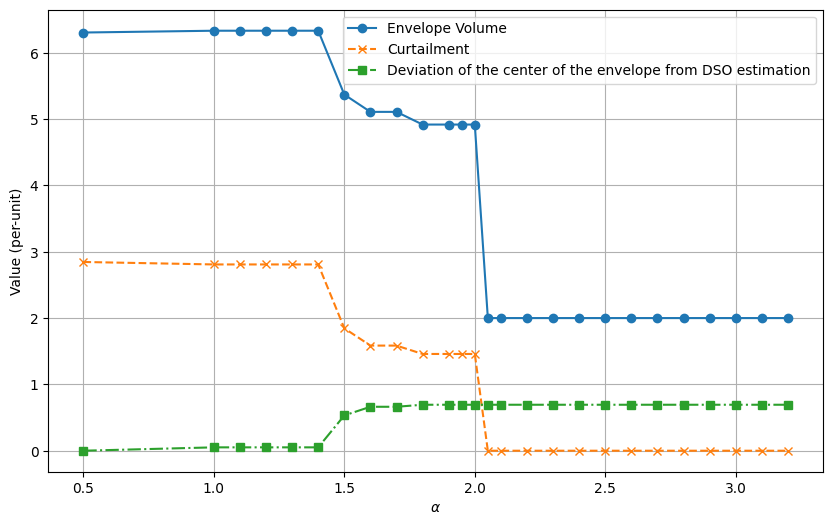

In [ ]:
# Convert A to a numpy array for easier plotting
alpha_values = np.array(A)

# Convert lists to numpy arrays, replacing None with NaN for plotting
enveloppe_taille_np = np.array(enveloppe_taille, dtype=float)
curtail_np = np.array(curtail, dtype=float)
close_np = np.array(close, dtype=float)


plt.figure(figsize=(10, 6))

# Plot enveloppe_taille vs alpha
plt.plot(alpha_values, enveloppe_taille_np, marker='o', linestyle='-', label='Envelope Volume')

# Plot curtail vs alpha
plt.plot(alpha_values, curtail_np, marker='x', linestyle='--', label='Curtailment')

# Plot close vs alpha
plt.plot(alpha_values, close_np, marker='s', linestyle='-.', label='Deviation of the center of the envelope from DSO estimation')


# Set x-axis to a logarithmic scale
#plt.xscale('log')

plt.xlabel('$\\alpha$')
plt.ylabel('Value (per-unit)')
#plt.title(f'Evolution of the volume of the envelope, curtailment and closeness to DSO estimation as a function of parameter Alpha (beta={beta})')
plt.legend()
plt.grid(True)

# Save the plot as a PDF file
plt.savefig('DOE_alloc_alpha.pdf')

plt.show()

In [ ]:
for n in m.Nodes:
  for vert_pow in m.i:
    for vert_volt in m.j:
      print(f"m.E[{n},{vert_pow},{vert_volt}].value: {m.E[n,vert_pow,vert_volt].value}")

m.E[0,0,0].value: 0.0
m.E[0,0,1].value: 0.0
m.E[0,1,0].value: 0.0
m.E[0,1,1].value: 0.0
m.E[1,0,0].value: 0.0
m.E[1,0,1].value: 0.0
m.E[1,1,0].value: 0.0
m.E[1,1,1].value: 0.0
m.E[2,0,0].value: 0.0
m.E[2,0,1].value: 0.0
m.E[2,1,0].value: 0.0
m.E[2,1,1].value: 0.0
m.E[11,0,0].value: 0.2
m.E[11,0,1].value: 0.2
m.E[11,1,0].value: 0.2
m.E[11,1,1].value: 0.20000000000000107
m.E[12,0,0].value: 0.5
m.E[12,0,1].value: 0.5
m.E[12,1,0].value: 0.5
m.E[12,1,1].value: 0.5


In [ ]:
m.O.value

0.0

In [ ]:
print(m.F[0,11,0,0].value)
print(m.F[0,11,0,1].value)

0.20757292252888693
0.20757292252888387


In [ ]:
print(m.P_C_set[1,0].value)
print(m.P_C_set[1,1].value)

print(m.P_C_set[2,0].value)
print(m.P_C_set[2,1].value)

0.024659587881951245
-1.5406595878819291
0.27534041211804366
-0.15934041211804367


In [ ]:
print(m.theta[0,0,0].value)
print(m.theta[0,0,1].value)

print(m.theta[11,0,0].value)
print(m.theta[11,0,1].value)

-17.399796418012752
-17.598210825281264
-17.665740784053057
-17.77623969841568


In [ ]:

m.O.value


0.0

In [ ]:
m.aux[1].value

1.5653191757638805

In [ ]:
m.P_C_set[1,0].value

1.2222970454791735

In [ ]:
m.P_C_set[1,1].value

-1.7678814577507405

In [ ]:
m.aux[2].value

-2.9901785032299224

In [ ]:
m.P[0].value

0

In [ ]:
m.P_plus[0,0,1].value

0.0

In [ ]:
m.P_minus[1,0,1].value

1.2222970454791735

In [ ]:
m.P_C_set[2,0].value

-1.9222970454791763

In [ ]:
m.P_C_set[1,1].value

-1.7678814577507405

In [ ]:
for (u,v) in m.Lines:
  print((u,v))

(0, 1)
(0, 2)
(0, 11)
(0, 12)
(1, 2)
(11, 1)
(12, 2)


In [ ]:
# Corrected loop structure to iterate over m.Lines
for (u, v) in m.Lines:
  for vert_pow in m.i:
    for vert_volt in m.j:
      print(f"Flow on line ({u}, {v}) for i={vert_pow}, j={vert_volt}: {m.F[u, v, vert_pow, vert_volt].value}")

Flow on line (0, 1) for i=0, j=0: 0.40880088218849053
Flow on line (0, 1) for i=0, j=1: 0.40880088218849764
Flow on line (0, 1) for i=1, j=0: -0.6762064861620627
Flow on line (0, 1) for i=1, j=1: -0.6762064861620637
Flow on line (0, 2) for i=0, j=0: -0.6762064861620646
Flow on line (0, 2) for i=0, j=1: -0.6762064861620661
Flow on line (0, 2) for i=1, j=0: 0.40880088218849364
Flow on line (0, 2) for i=1, j=1: 0.40880088218849187
Flow on line (0, 11) for i=0, j=0: 0.20757292252888693
Flow on line (0, 11) for i=0, j=1: 0.20757292252888387
Flow on line (0, 11) for i=1, j=0: -0.08575173082688536
Flow on line (0, 11) for i=1, j=1: -0.08575173082688255
Flow on line (0, 12) for i=0, j=0: 0.05983268144468681
Flow on line (0, 12) for i=0, j=1: 0.05983268144468955
Flow on line (0, 12) for i=1, j=0: 0.353157334800454
Flow on line (0, 12) for i=1, j=1: 0.3531573348004545
Flow on line (1, 2) for i=0, j=0: -0.8059232407617986
Flow on line (1, 2) for i=0, j=1: -0.8059232407617933
Flow on line (1, 2) f

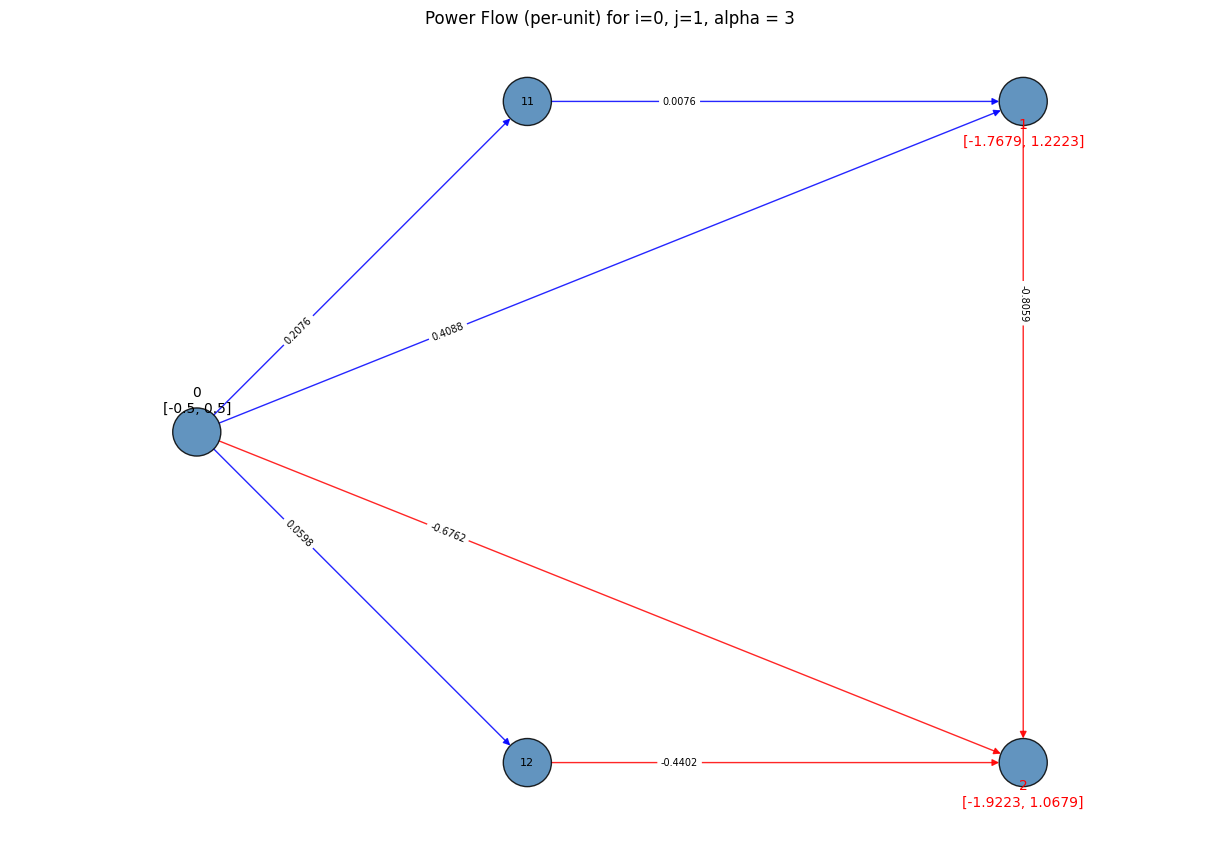

In [ ]:
def plot_power_flow(m, i, j):
    pos = nx.get_node_attributes(G, 'pos')
    # Use node indices as labels
    labels = {}
    label_colors = [] # This is for node colors, will remove this later if needed or set to default
    for n in G.nodes():
        label_text = f"{n}"
        if n in m.parents:
            # Display parent bounds using the global P_min and P_max parameters
            label_text += f"\n[{P_min/3}, {P_max/3}]"
            # No specific color for label text here, use default
            label_colors.append('steelblue') # Default node color based on previous plots
        elif n in m.children:
            # Display children interval with smaller value first
            p_c_values = [m.P_C_set[n, 0].value, m.P_C_set[n, 1].value]
            label_text += f"\n[{round(min(p_c_values), 4)}, {round(max(p_c_values), 4)}]"
            # We will try to color this text red when drawing labels
            label_colors.append('steelblue') # Default node color
        else:
            label_colors.append('steelblue') # Default node color
        labels[n] = label_text


    plt.figure(figsize=(12, 8))

    edge_colors = []
    edge_labels = {}

    for u, v in G.edges():
        try:
            # Correct the sign of the flow value for plotting
            flow_value = m.F[u, v, i, j].value
            if flow_value is not None:
                edge_labels[(u, v)] = f"{round(flow_value, 4)}"
                if flow_value > 0:
                    edge_colors.append('blue')  # Positive flow (now correctly represents flow from u to v)
                elif flow_value < 0:
                    edge_colors.append('red')  # Negative (reverse) flow (now correctly represents flow from v to u)
                else:
                    edge_colors.append('gray') # No flow
            else:
                edge_colors.append('gray') # No flow value
        except:
            edge_colors.append('gray') # Handle cases where edge might not be in m.F

    # Draw the network
    nx.draw(
        G, pos,
        with_labels=False, # Draw labels separately for color control
        node_size=1200,
        edge_color=edge_colors, # Use the calculated edge colors
        edgecolors="black", font_size=8,
        alpha=0.85,
        node_color = label_colors # Apply node colors
    )

    # Draw labels with different colors
    for n in G.nodes():
        x, y = pos[n]
        text = labels[n]
        if n in m.children:
            plt.text(x, y - 0.1, text, fontsize=10, ha='center', va='top', color='red') # Color children interval red
        elif n in m.parents:
             plt.text(x, y + 0.1, text, fontsize=10, ha='center', va='bottom', color='black') # Color parent bounds black
        else:
             plt.text(x, y, text, fontsize=8, ha='center', va='center', color='black') # Default color for other labels


    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7, label_pos=0.3)

    plt.title(f"Power Flow (per-unit) for i={i}, j={j}, alpha = 3")
    plt.axis("equal")
    plt.show()

# Example usage (assuming m, i=0, and j=0 are defined)
plot_power_flow(m, 0, 1)

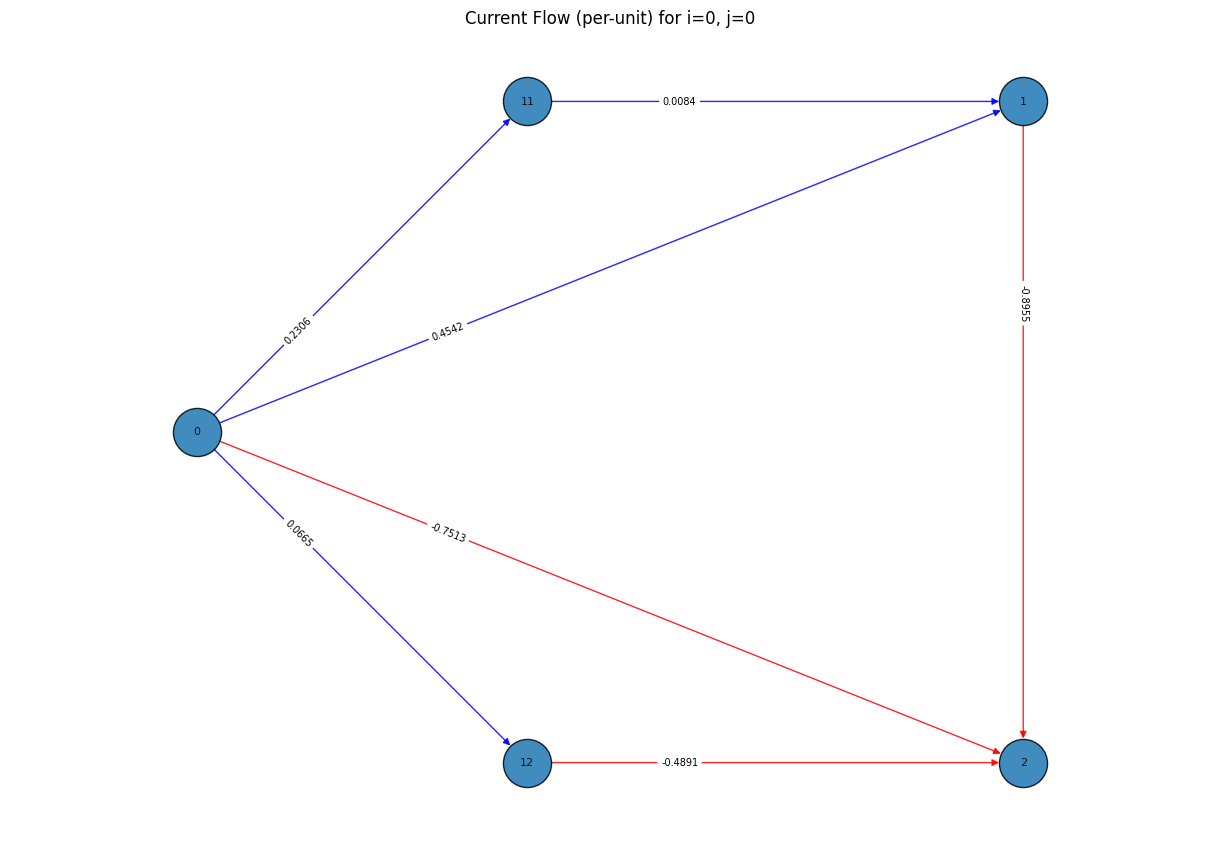

In [ ]:
def plot_current_flow(m, i, j):
    pos = nx.get_node_attributes(G, 'pos')
    # Use node indices as labels
    labels = {n: n for n in G.nodes()}

    plt.figure(figsize=(12, 8))

    edge_colors = []
    edge_labels = {}

    for u, v in G.edges():
        try:
            # Get the current value from the model
            current_value = m.I[u, v, i, j].value
            if current_value is not None:
                edge_labels[(u, v)] = f"{round(current_value, 4)}"
                if current_value > 0:
                    edge_colors.append('blue')  # Positive current flow
                elif current_value < 0:
                    edge_colors.append('red')  # Negative current flow
                else:
                    edge_colors.append('gray') # No current flow
            else:
                edge_colors.append('gray') # No current value
        except:
            edge_colors.append('gray') # Handle cases where edge might not be in m.I

    nx.draw(
        G, pos,
        with_labels=True, labels=labels, # Set with_labels to True and pass node indices as labels
        node_size=1200,
        edge_color=edge_colors, # Use the calculated edge colors
        edgecolors="black", font_size=8,
        alpha=0.85
    )

    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7, label_pos=0.3)

    plt.title(f"Current Flow (per-unit) for i={i}, j={j}")
    plt.axis("equal")
    plt.show()

# Example usage (assuming m, i=0, and j=0 are defined)
plot_current_flow(m, 0, 0)

In [ ]:
B = [0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,1.95,2,2.05,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3]
#A = range(-3, 26)
alpha = 1.5
enveloppe_taille = []
curtail = []
close = []

for beta in B:
  print(alpha)
  def objective_rule(m):
    return  m.tot - alpha*m.O - beta * m.tot_bis
  m.objective = pyo.Objective(rule=objective_rule, sense=pyo.maximize)
  params = {
    "WLSACCESSID": 'efa10779-150a-495c-ab62-6a20ff44c598',
    "WLSSECRET": 'fa980d94-a6fd-4d7b-aa68-b0e19ddd2e84',
    "LICENSEID": 2651433,
           }
  env = gp.Env(params=params)
  solver = pyo.SolverFactory('gurobi', env= env)
  results = solver.solve(m, tee=True)

  # Check the termination condition before accessing results
  if results.solver.termination_condition == pyo.TerminationCondition.optimal:
      curtail.append(m.O.value)
      enveloppe_taille.append(m.tot.value)
      close.append(m.tot_bis.value)

  else:
      # Append None for non-optimal results to maintain list length
      curtail.append(None)
      enveloppe_taille.append(None)
      close.append(None)

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.5
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpo781164l.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x6478af50
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [5e-01, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00 

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.5
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpl5kqkyk5.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x4adb080e
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [6e-01, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.01s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00 

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.5
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmp1m0osle6.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0xdc49362c
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [7e-01, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00 

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.5
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmph7cszqql.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x5b8bdbec
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [8e-01, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00 

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().



Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpy92xhznp.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0xf4f54d0d
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [9e-01, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00   2

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.5
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmp7afi8e8y.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0xb5185362
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00 

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().



Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpgapn2lyf.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x358c069a
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00   2

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.5
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmp3oxx5dpv.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0xd02364b9
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00 

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.5
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpxk1wm5jm.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x63d4c188
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00 

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.5
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpog09nt7q.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x89d2e2e3
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00 

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.5
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpcvsiuauv.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x72213866
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00 

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().



Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpqrrqy7bl.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x1fac2f03
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00   2

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().



Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmplnbs8k97.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x4089b7b1
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00   2

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.5
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpzhxdb2cv.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x0343b114
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00 

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.5
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpxe3s0_ce.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0xb558f371
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00 

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.5
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpbfeppmk8.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0xbff46afb
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00 

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.5
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpwhy4eel0.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x7d5e3e84
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00 

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.5
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpyx_08be1.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x76205d6b
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00 

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.5
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmp6r7l2239.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x7b5e8f52
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00 

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.5
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpl602g8hy.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x9ca9a7f3
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00 

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().



Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmp8qgwbmu8.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0xed4ce1c7
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00   2

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.5
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpt3s1q4fo.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x3dc597e1
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00 

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.5
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmp04s0x1zd.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x868f1b14
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00 

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.5
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmp99v_pgr7.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x7a4bfbdf
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00 

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.5
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpk6c9cz20.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x2dd082b6
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00 

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.5
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmprxucizj8.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0xb4e56665
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00 

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmpdxvdob5v.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x29275e8a
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00   2.

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.5
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmp4i8ii95l.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0x295b6444
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.00s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00 

In [ ]:
print(enveloppe_taille)
print(curtail)
print(close)

[5.10861963376804, 5.10861963376804, 5.10861963376804, 5.10861963376804, 5.10861963376804, 5.369410524947899, 6.332075999423944, 6.332075999423944, 6.332075999423944, 6.332075999423944, 6.332075999423944, 6.332075999423944, 6.304925290006747, 6.304925290006747, 6.304925290006747, 6.304925290006747, 6.304925290006747, 6.304925290006747, 6.304925290006747, 6.304925290006747, 6.304925290006747, 6.304925290006747, 6.304925290006747, 6.304925290006747, 6.304925290006747, 6.304925290006747, 6.304925290006747, 6.304925290006747]
[1.5849266707208456, 1.5849266707208456, 1.5849266707208456, 1.5849266707208456, 1.5849266707208456, 1.8457175619007082, 2.80838303637675, 2.80838303637675, 2.80838303637675, 2.80838303637675, 2.80838303637675, 2.80838303637675, 2.845662645003374, 2.845662645003374, 2.845662645003374, 2.845662645003374, 2.845662645003374, 2.845662645003374, 2.845662645003374, 2.845662645003374, 2.845662645003374, 2.845662645003374, 2.845662645003374, 2.845662645003374, 2.8456626450033

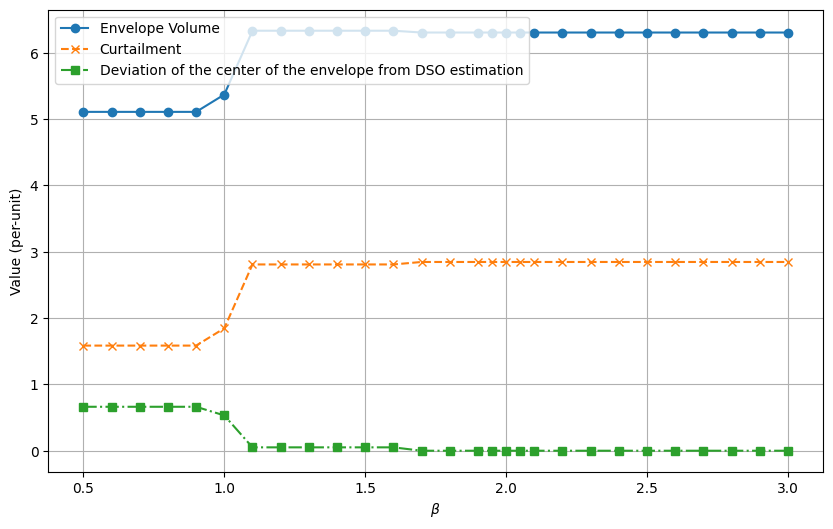

In [ ]:
# Convert A to a numpy array for easier plotting
alpha_values = np.array(B)

# Convert lists to numpy arrays, replacing None with NaN for plotting
enveloppe_taille_np = np.array(enveloppe_taille, dtype=float)
curtail_np = np.array(curtail, dtype=float)
close_np = np.array(close, dtype=float)


plt.figure(figsize=(10, 6))

# Plot enveloppe_taille vs alpha
plt.plot(alpha_values, enveloppe_taille_np, marker='o', linestyle='-', label='Envelope Volume')

# Plot curtail vs alpha
plt.plot(alpha_values, curtail_np, marker='x', linestyle='--', label='Curtailment')

# Plot close vs alpha
plt.plot(alpha_values, close_np, marker='s', linestyle='-.', label='Deviation of the center of the envelope from DSO estimation')


# Set x-axis to a logarithmic scale
#plt.xscale('log')

# Save the plot as a PDF file


plt.xlabel('$\\beta$')
plt.ylabel('Value (per-unit)')
#plt.title(f'Evolution of the volume of the envelope, curtailment and closeness to estimation as a function of parameter $\\beta$ ($\\alpha$ = 2)')
plt.legend()
plt.grid(True)
plt.savefig('DOE_alloc_beta.pdf')

plt.show()

In [ ]:
beta = 1
alpha = 1.5
enveloppe_taille = []
curtail = []
close = []


print(alpha)
def objective_rule(m):
  return  m.tot - alpha*m.O - beta * m.tot_bis
m.objective = pyo.Objective(rule=objective_rule, sense=pyo.maximize)
params = {
    "WLSACCESSID": 'efa10779-150a-495c-ab62-6a20ff44c598',
    "WLSSECRET": 'fa980d94-a6fd-4d7b-aa68-b0e19ddd2e84',
    "LICENSEID": 2651433,
           }
env = gp.Env(params=params)
solver = pyo.SolverFactory('gurobi', env= env)
results = solver.solve(m, tee=True)

  # Check the termination condition before accessing results
if results.solver.termination_condition == pyo.TerminationCondition.optimal:
  curtail.append(m.O.value)
  enveloppe_taille.append(m.tot.value)
  close.append(m.tot_bis.value)

else:

      # Append None for non-optimal results to maintain list length
  curtail.append(None)
  enveloppe_taille.append(None)
  close.append(None)

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


1.5
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmp55vdo04j.pyomo.lp
Reading time = 0.00 seconds
x1: 438 rows, 179 columns, 808 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 438 rows, 179 columns and 808 nonzeros
Model fingerprint: 0xb5185362
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 5e+01]
Presolve removed 377 rows and 117 columns
Presolve time: 0.01s
Presolved: 61 rows, 62 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7473859e+00 

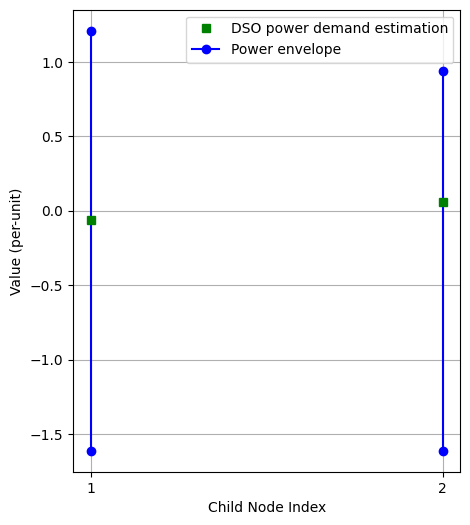

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data for plotting
children_nodes = list(m.children)
p_c_set_0_values = [m.P_C_set[n, 0].value for n in m.children]
p_c_set_1_values = [m.P_C_set[n, 1].value for n in m.children]
info_dso_values = [m.info_DSO_param[n] for n in m.children]

# Create the plot
plt.figure(figsize=(5, 6))

# Adjust x_pos to control spacing (e.g., reduce the multiplier)
x_pos = np.arange(len(children_nodes)) * 0.0005 # Reduced spacing by multiplying by 0.0005

# Plot lines between P_C_set[n][0] and P_C_set[n][1] for each child node
for i in range(len(children_nodes)):
    plt.plot([x_pos[i], x_pos[i]], [p_c_set_1_values[i], p_c_set_0_values[i]], marker='o', linestyle='-', color='blue')

# Plot only dots for info_DSO_param
plt.plot(x_pos, info_dso_values, marker='s', linestyle='', label='DSO power demand estimation', color='green')

# Create legend handles for the P_C_set endpoints
# We plot invisible points with the desired labels to create legend entries
plt.plot([], [], marker='o', linestyle='-', color='blue', label='Power envelope')


plt.xticks(x_pos, children_nodes)
plt.xlabel('Child Node Index')
plt.ylabel('Value (per-unit)')
#plt.title('Comparison of P_C_set values and DSO estimation for Child Nodes')
plt.legend()
plt.grid(True)

# Save the plot as a PDF file
plt.savefig('child_nodes_envelopes.pdf')

plt.show()